<a href="https://colab.research.google.com/github/akhildharmula/AI/blob/main/FinalAllModelscode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Reading datasets

In [4]:
features = pd.read_csv("/content/drive/MyDrive/ai/features.csv")
features.drop(['IsHoliday'], axis = 1, inplace = True)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
train = pd.read_csv("/content/drive/MyDrive/ai/train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Merging the two data sets based on the common arttributes(columns) store and data

In [6]:
mldata=pd.merge(train,features,left_on=['Store','Date'],right_on=['Store','Date'],how='left')
mldata

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


# Dealing with the date column

In [7]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 45.4+ MB


In [8]:
mldata['Date'] = pd.to_datetime(mldata['Date'])

In [9]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(10), int64(2)
memory usage: 4

In [10]:
mldata['year'] = mldata['Date'].dt.year
mldata['month'] = mldata['Date'].dt.month
mldata['day'] = mldata['Date'].dt.day
mldata

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


In [11]:
sales=mldata.copy(deep=True)

In [12]:
mldata.drop(['Date'], axis = 1, inplace = True)

In [13]:
mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421566,45,98,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421567,45,98,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421568,45,98,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


# Converting the values in IsHoliday column in to numerical(i.e True to 1 and False to 2)

In [14]:
mldata['IsHoliday']=mldata['IsHoliday'].astype('int')
mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5
1,1,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12
2,1,1,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19
3,1,1,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26
4,1,1,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421566,45,98,628.10,0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421567,45,98,1061.02,0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421568,45,98,760.01,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


In [15]:
mldata.shape

(421570, 16)

# Correlation

In [16]:
corelation=mldata.corr()
round(corelation,3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
Store,1.000,0.024,-0.085,-0.001,-0.050,0.065,-0.120,-0.035,-0.032,-0.010,-0.027,-0.211,0.209,0.003,0.001,-0.000
Dept,0.024,1.000,0.148,0.001,0.004,0.004,-0.002,0.000,0.002,0.004,0.000,-0.007,0.008,0.004,0.001,-0.001
Weekly_Sales,-0.085,0.148,1.000,0.013,-0.002,-0.000,0.085,0.024,0.060,0.045,0.090,-0.021,-0.026,-0.010,0.028,-0.006
IsHoliday,-0.001,0.001,0.013,1.000,-0.156,-0.078,-0.036,0.335,0.428,-0.001,-0.054,-0.002,0.010,-0.057,0.123,0.045
Temperature,-0.050,0.004,-0.002,-0.156,1.000,0.144,-0.041,-0.324,-0.097,-0.064,-0.018,0.182,0.097,0.066,0.236,0.027
Fuel_Price,0.065,0.004,-0.000,-0.078,0.144,1.000,0.061,-0.221,-0.102,-0.045,-0.128,-0.164,-0.034,0.780,-0.041,0.028
MarkDown1,-0.120,-0.002,0.085,-0.036,-0.041,0.061,1.000,0.024,-0.108,0.819,0.160,-0.056,0.050,0.141,-0.176,-0.292
MarkDown2,-0.035,0.000,0.024,0.335,-0.324,-0.221,0.024,1.000,-0.050,-0.008,-0.007,-0.040,0.021,-0.222,-0.005,0.064
MarkDown3,-0.032,0.002,0.060,0.428,-0.097,-0.102,-0.108,-0.050,1.000,-0.071,-0.026,-0.024,0.013,-0.319,0.188,0.138
MarkDown4,-0.010,0.004,0.045,-0.001,-0.064,-0.045,0.819,-0.008,-0.071,1.000,0.108,-0.050,0.025,0.126,-0.195,-0.313


correlation between the weeklysales and the other columns 

In [17]:
mldata.corr().loc[:,'Weekly_Sales'].abs().sort_values(ascending=False)[1:]

Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
Store           0.085195
MarkDown3       0.060385
MarkDown4       0.045414
month           0.028409
Unemployment    0.025864
MarkDown2       0.024130
CPI             0.020921
IsHoliday       0.012774
year            0.010111
day             0.006187
Temperature     0.002312
Fuel_Price      0.000120
Name: Weekly_Sales, dtype: float64

In [18]:
sns.set(rc={'figure.figsize':(25,25)})

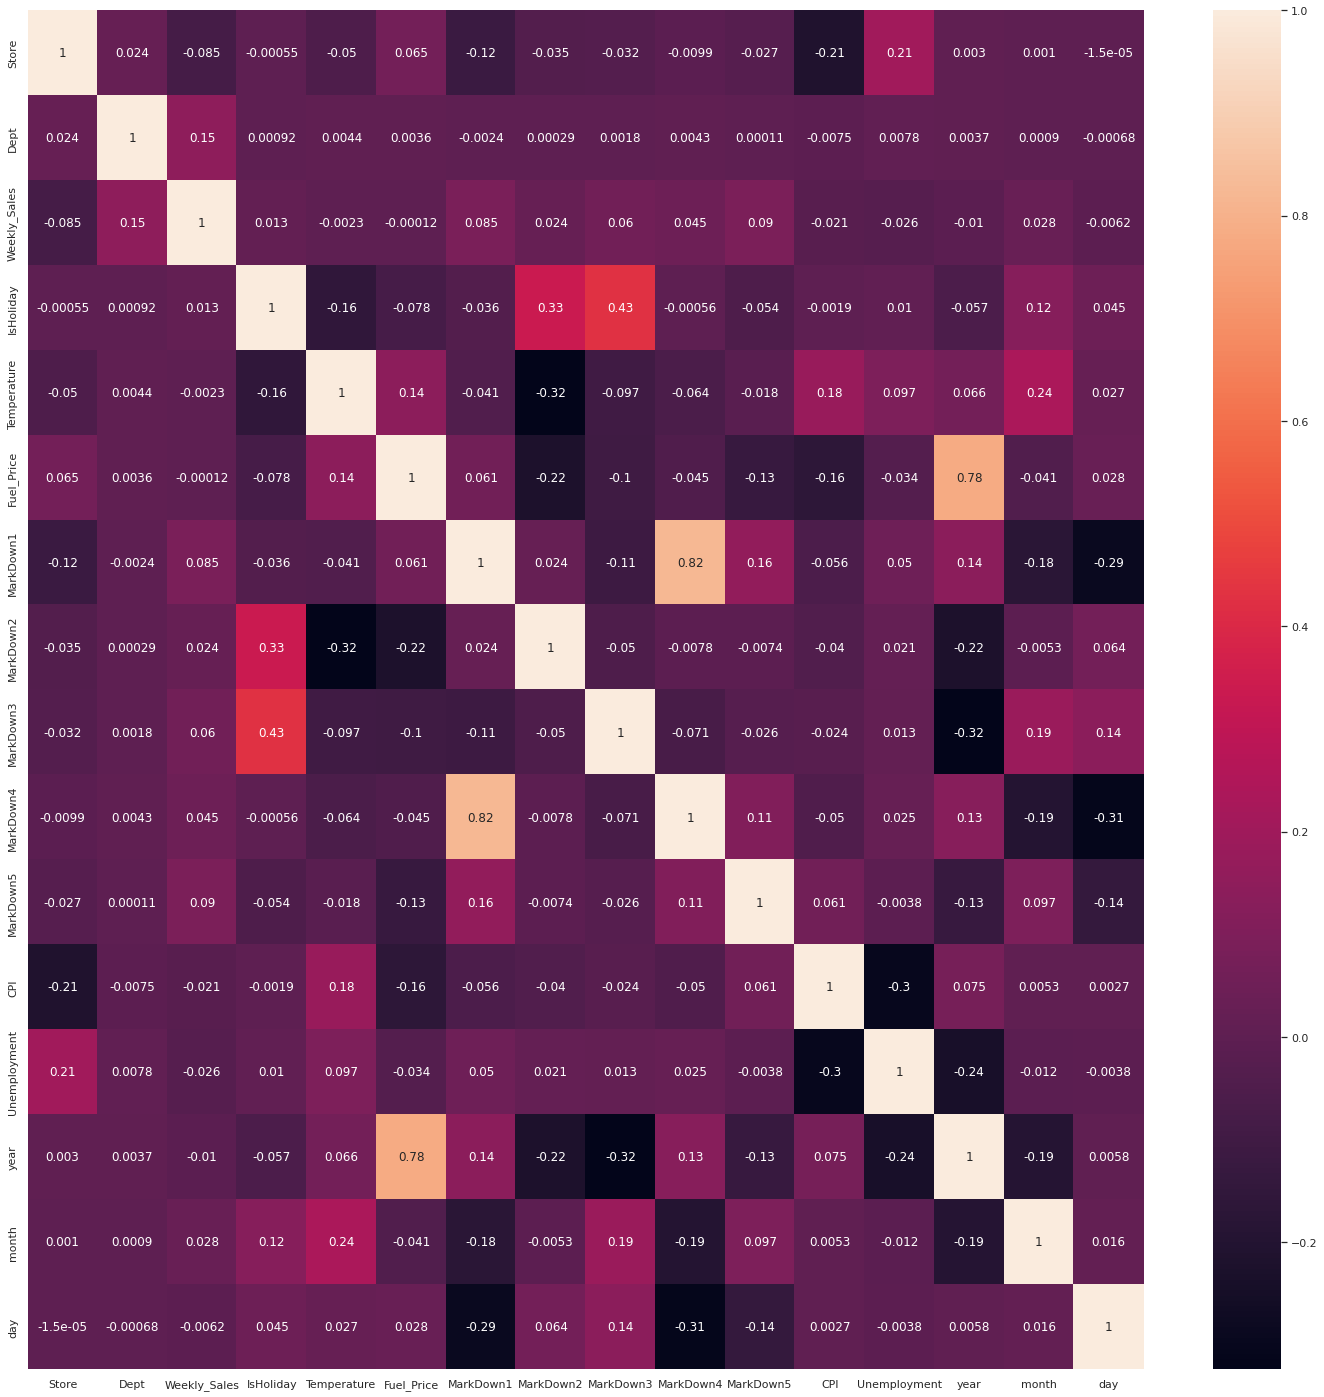

In [19]:
sns.heatmap(mldata.corr(), annot=True)

# Outliers Treatment

Outliers Treatment in column weeklysales

In [20]:
import matplotlib.pyplot as plt

In [21]:
sns.set(rc={'figure.figsize':(12,9)})

In [22]:
mldata['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


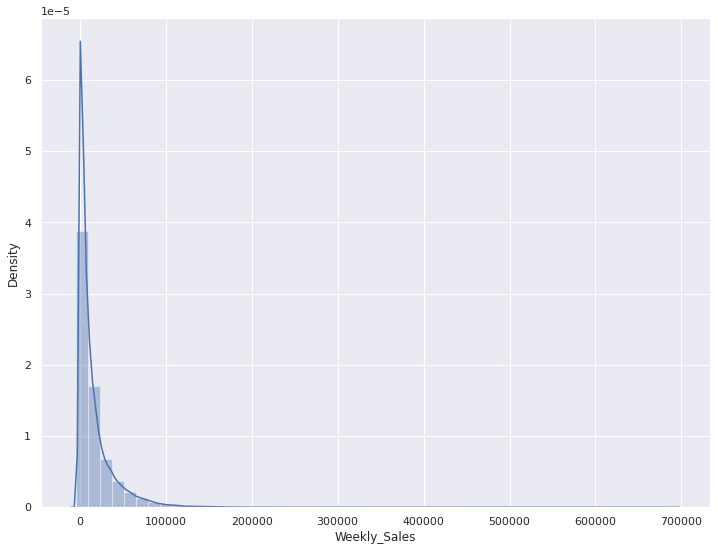

In [23]:
sns.distplot(mldata['Weekly_Sales'])

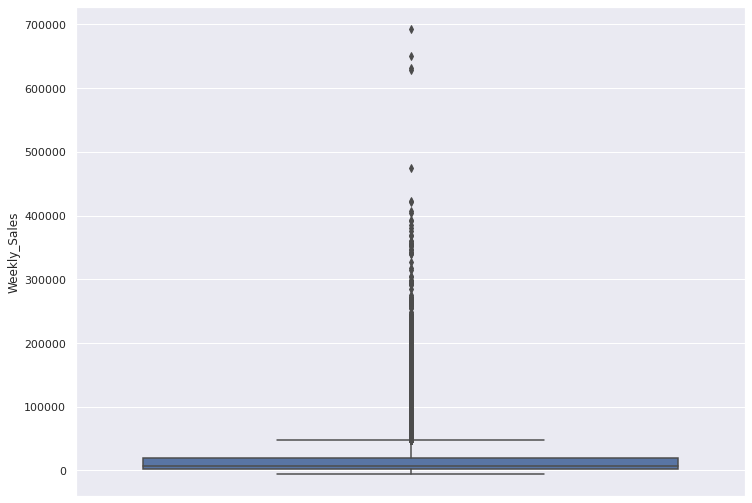

In [24]:
sns.boxplot(y=mldata['Weekly_Sales'])

In [25]:
# Finding the IQR
percentile25 = mldata['Weekly_Sales'].quantile(0.25)
percentile75 = mldata['Weekly_Sales'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

18126.2025

In [26]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 47395.15625
Lower limit -25109.653749999998


In [27]:
mldata[mldata['Weekly_Sales'] > upper_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
8,1,1,57258.43,0,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,2010,4,2
46,1,1,55931.23,0,52.33,2.886,NaN,NaN,NaN,NaN,NaN,211.405122,7.838,2010,12,24
63,1,1,50510.31,0,72.99,3.807,NaN,NaN,NaN,NaN,NaN,215.459905,7.682,2011,4,22
106,1,1,54060.10,0,45.32,3.510,9873.33,11062.27,9.80,8409.31,3402.66,220.425759,7.348,2012,2,17
113,1,1,57592.12,0,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,2012,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421285,45,95,49380.11,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421286,45,95,50241.01,0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421287,45,95,49334.77,0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421288,45,95,48434.97,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


In [28]:
mldata[mldata['Weekly_Sales'] < lower_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day


In [29]:
mldata['Weekly_Sales'] = np.where(
    mldata['Weekly_Sales'] > upper_limit,
    upper_limit,
    np.where(
        mldata['Weekly_Sales'] < lower_limit,
        lower_limit,
        mldata['Weekly_Sales']
    )
)

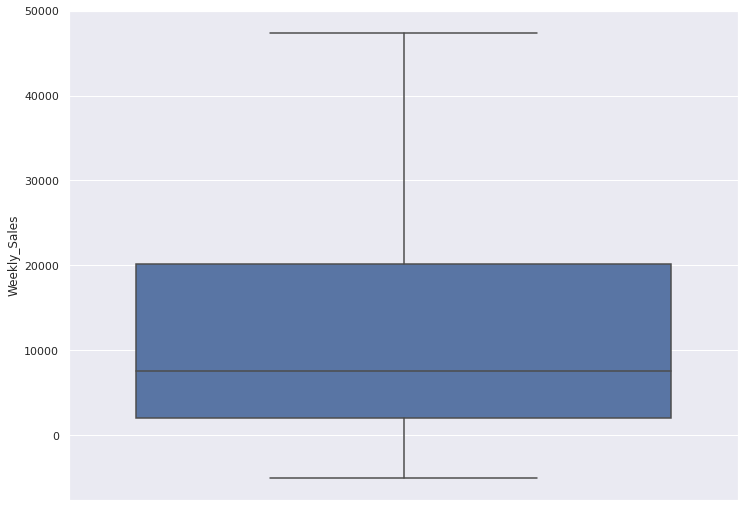

In [30]:
sns.boxplot(y=mldata['Weekly_Sales'])

In [31]:
mldata['Weekly_Sales'].shape

(421570,)

In [32]:
mldata['Weekly_Sales'].describe()

count    421570.000000
mean      13649.405016
std       14908.783751
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max       47395.156250
Name: Weekly_Sales, dtype: float64

**outliers in temperature**

In [33]:
mldata['Temperature'].describe()

count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


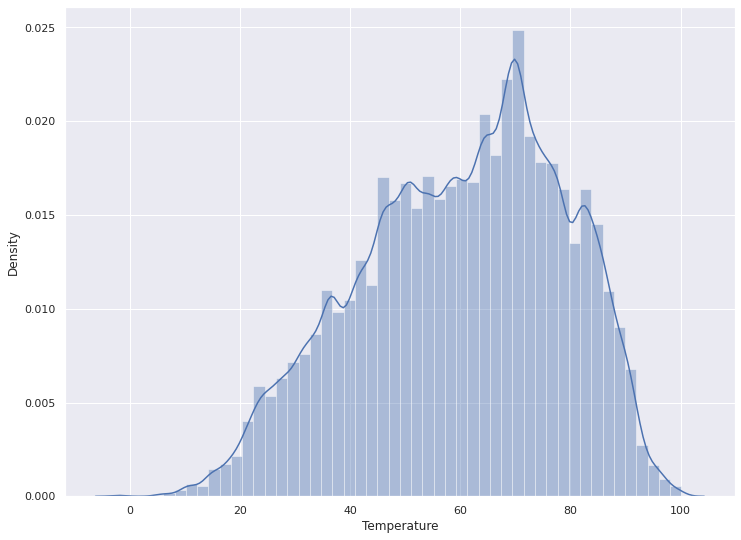

In [34]:
sns.distplot(mldata['Temperature'])

In [35]:
mldata['Temperature'].skew()

-0.3214041519699762

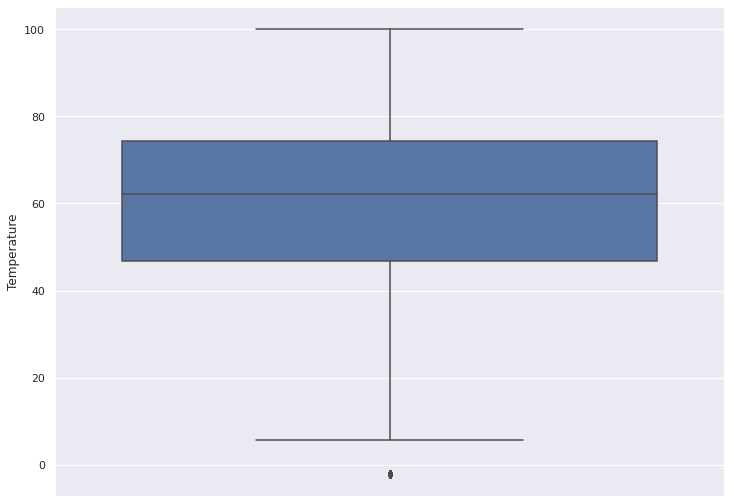

In [36]:
sns.boxplot(y=mldata['Temperature'])

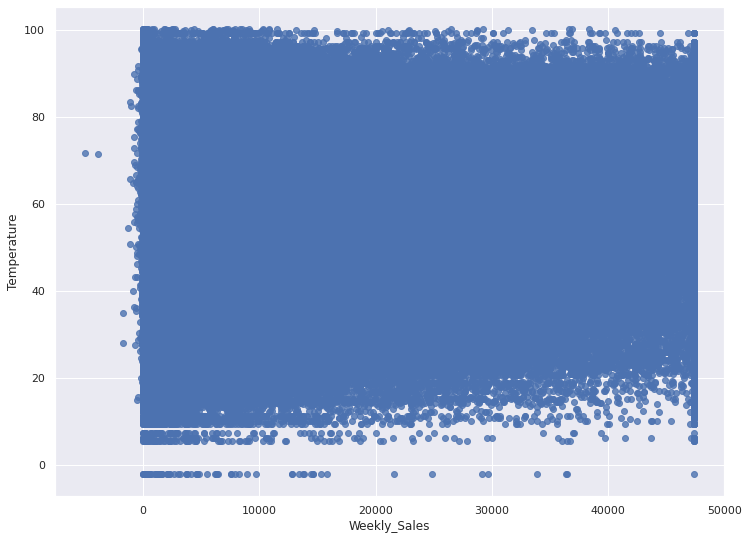

In [37]:
sns.regplot(x='Weekly_Sales',y='Temperature',scatter=True,fit_reg=False,data=mldata)

In [38]:
upper_limit = mldata['Temperature'].mean() + 3*mldata['Temperature'].std()
lower_limit = mldata['Temperature'].mean() - 3*mldata['Temperature'].std()

In [39]:
upper_limit

115.43385217565681

In [40]:
lower_limit

4.746265289972172

In [41]:
mldata['Temperature'] = np.where(
    mldata['Temperature']>upper_limit,
   mldata['Temperature'],
    np.where(
        mldata['Temperature']<lower_limit,
        lower_limit,
       mldata['Temperature']
    )
)

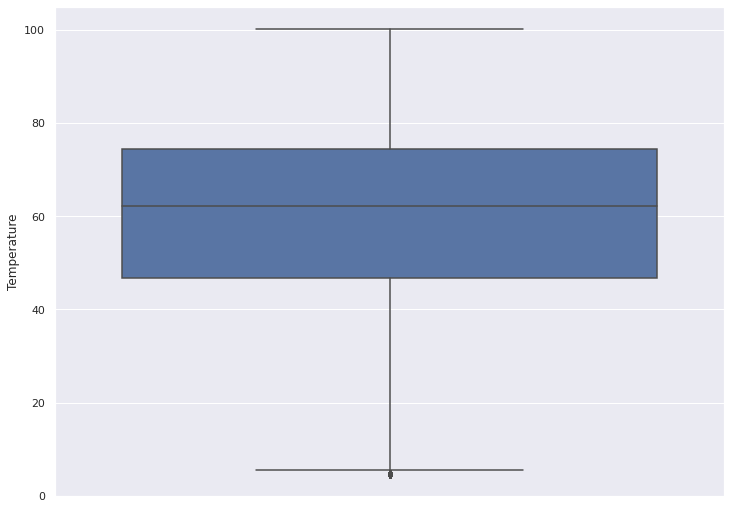

In [42]:
sns.boxplot(y=mldata['Temperature'])

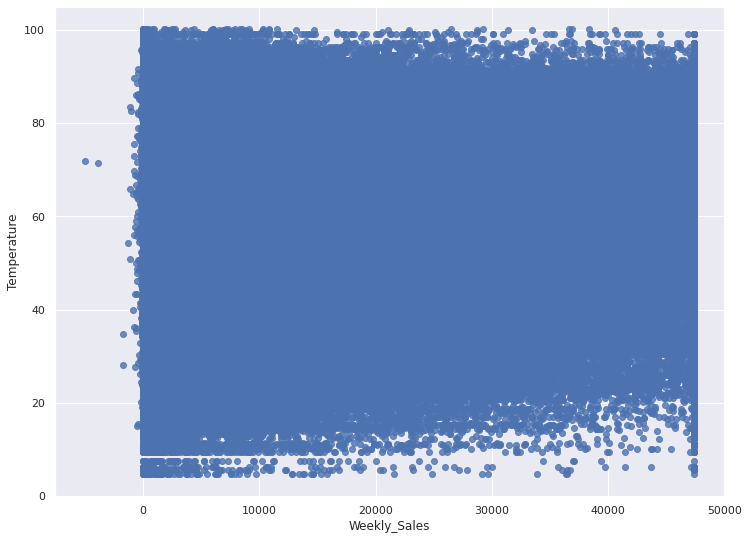

In [43]:
sns.regplot(x='Weekly_Sales',y='Temperature',scatter=True,fit_reg=False,data=mldata)

**Outliers in fuel price**

In [44]:
mldata['Fuel_Price'].describe()

count    421570.000000
mean          3.361027
std           0.458515
min           2.472000
25%           2.933000
50%           3.452000
75%           3.738000
max           4.468000
Name: Fuel_Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


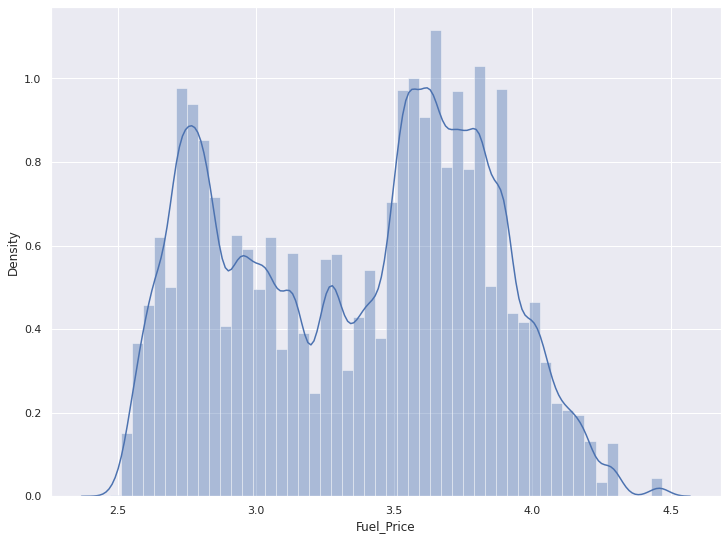

In [45]:
sns.distplot(mldata['Fuel_Price'])

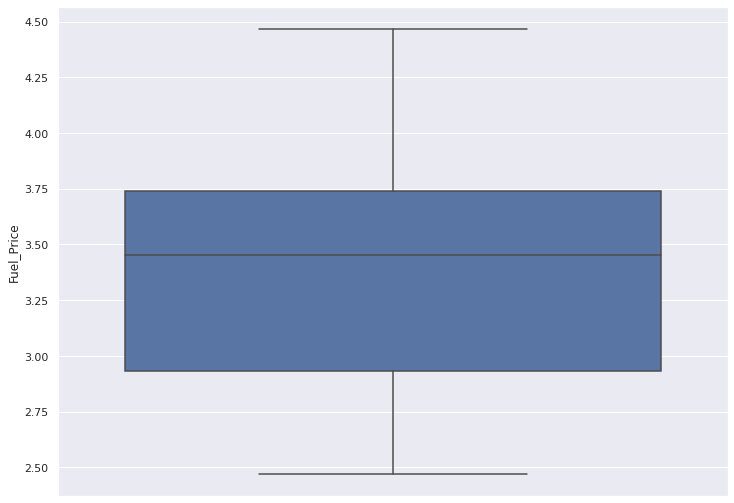

In [46]:
sns.boxplot(y=mldata['Fuel_Price'])

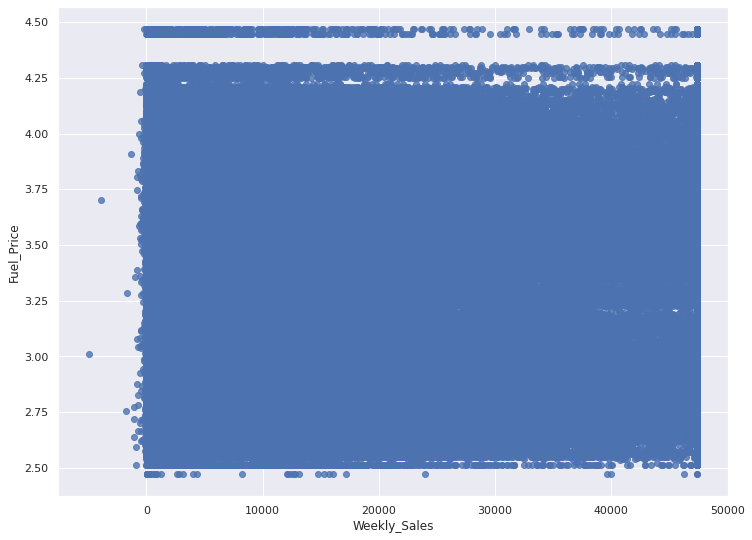

In [47]:
sns.regplot(x='Weekly_Sales',y='Fuel_Price',scatter=True,fit_reg=False,data=mldata)

**outliers in cpi(Consumer Price Index)**

In [48]:
mldata['CPI'].describe()

count    421570.000000
mean        171.201947
std          39.159276
min         126.064000
25%         132.022667
50%         182.318780
75%         212.416993
max         227.232807
Name: CPI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


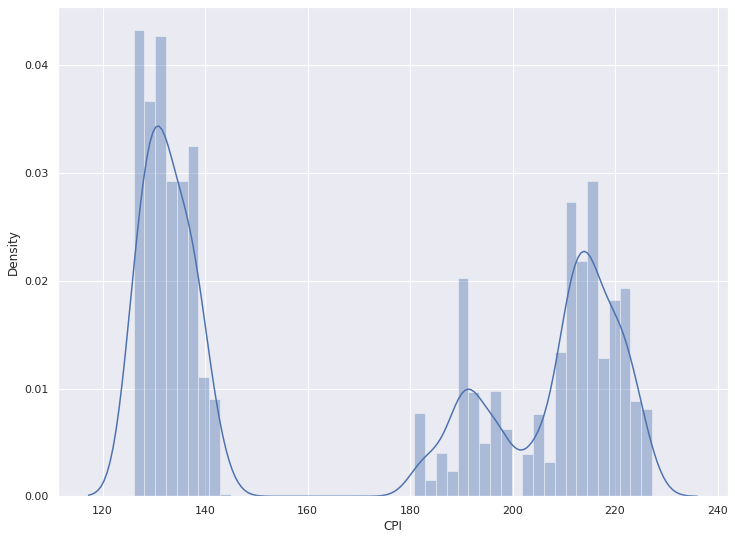

In [49]:
sns.distplot(mldata['CPI'])

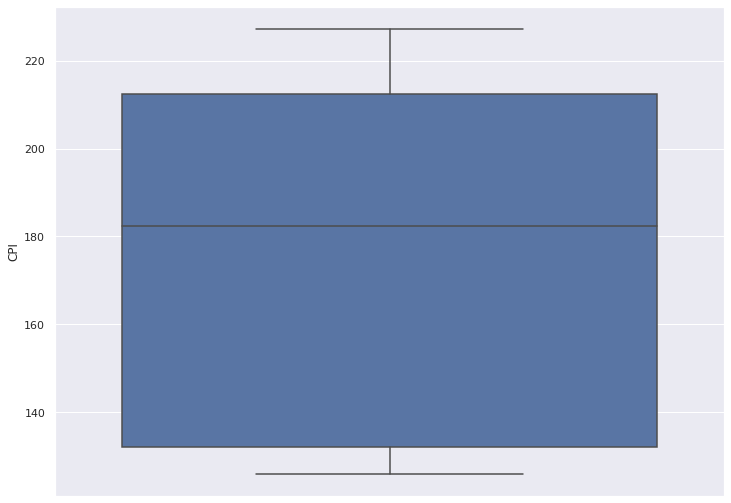

In [50]:
sns.boxplot(y=mldata['CPI'])

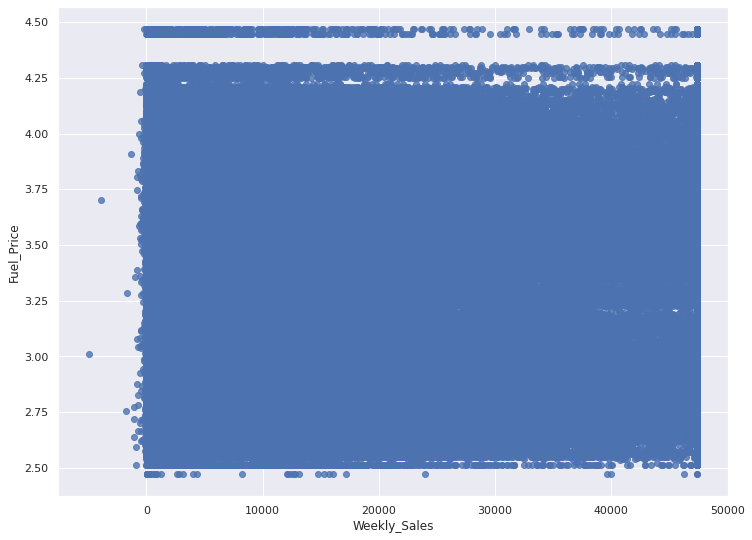

In [51]:

sns.regplot(x='Weekly_Sales',y='Fuel_Price',scatter=True,fit_reg=False,data=mldata)

**outliers in Unemployment Rate**

In [52]:
mldata['Unemployment'].describe()

count    421570.000000
mean          7.960289
std           1.863296
min           3.879000
25%           6.891000
50%           7.866000
75%           8.572000
max          14.313000
Name: Unemployment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


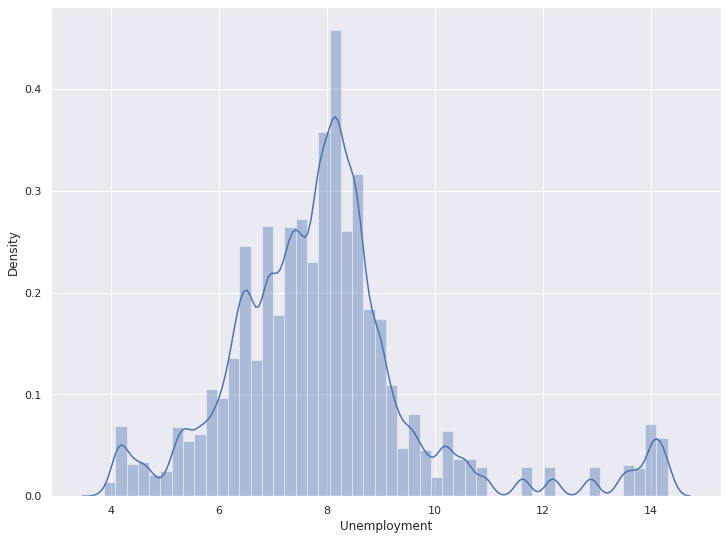

In [53]:
sns.distplot(mldata['Unemployment'])

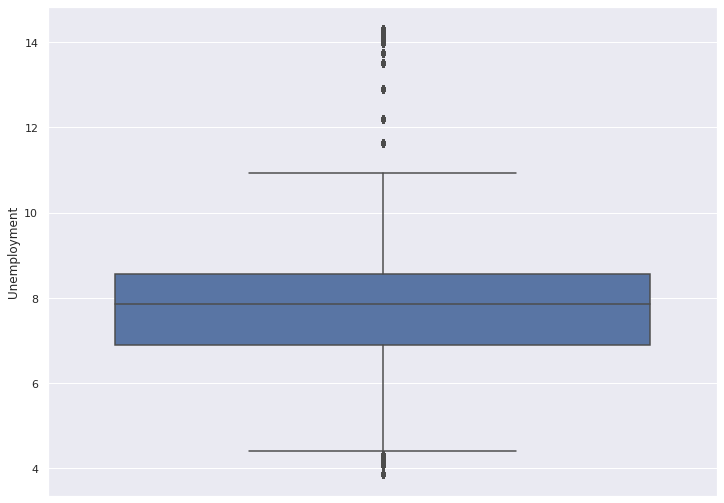

In [54]:
sns.boxplot(y=mldata['Unemployment'])

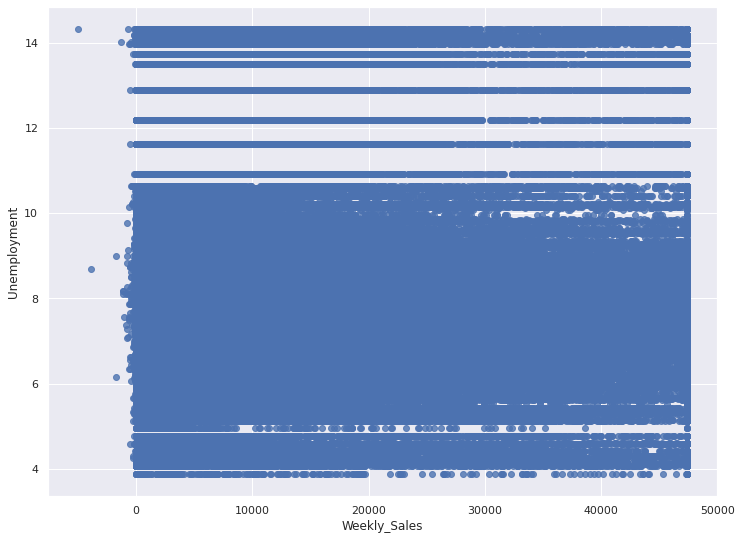

In [55]:
sns.regplot(x='Weekly_Sales',y='Unemployment',scatter=True,fit_reg=False,data=mldata)

In [56]:
percentile25 = mldata['Unemployment'].quantile(0.25)
percentile75 = mldata['Unemployment'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.681000000000001

In [57]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11.093500000000002
Lower limit 4.369499999999999


In [58]:
mldata[mldata['Unemployment'] > upper_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
107901,12,1,17426.75,0,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,2010,2,5
107902,12,1,37734.82,1,47.87,2.946,NaN,NaN,NaN,NaN,NaN,126.496258,13.975,2010,2,12
107903,12,1,22135.29,0,54.83,2.915,NaN,NaN,NaN,NaN,NaN,126.526286,13.975,2010,2,19
107904,12,1,14942.21,0,50.23,2.825,NaN,NaN,NaN,NaN,NaN,126.552286,13.975,2010,2,26
107905,12,1,17098.49,0,53.77,2.987,NaN,NaN,NaN,NaN,NaN,126.578286,13.975,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361055,38,98,4799.44,0,84.83,4.103,491.31,NaN,11.80,NaN,1999.19,130.889677,11.627,2012,6,8
361056,38,98,4239.92,0,85.94,4.144,635.42,NaN,0.13,NaN,1800.18,130.829533,11.627,2012,6,15
361057,38,98,4000.23,0,91.61,4.014,576.00,NaN,NaN,NaN,2241.95,130.792900,11.627,2012,6,22
361058,38,98,4005.14,0,90.47,3.875,350.56,NaN,NaN,26.87,1447.29,130.756267,11.627,2012,6,29


In [59]:
mldata[mldata['Unemployment'] < lower_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
29631,4,1,47395.15625,0,67.69,3.864,11341.17,NaN,73.38,5677.89,7821.95,131.037548,4.308,2012,4,6
29632,4,1,47395.15625,0,68.69,3.881,12506.74,5941.43,30.84,3915.29,4392.95,131.108000,4.308,2012,4,13
29633,4,1,26161.45000,0,68.60,3.864,2774.39,4279.41,43.43,2409.97,4544.22,131.117333,4.308,2012,4,20
29634,4,1,26812.03000,0,76.47,3.810,3993.66,97.77,26.68,113.37,3947.45,131.126667,4.308,2012,4,27
29635,4,1,27487.23000,0,80.14,3.747,13737.91,NaN,93.65,6993.97,4541.89,131.136000,4.308,2012,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380967,40,99,0.05000,0,66.11,3.884,10904.29,38.81,23.95,2684.17,2912.76,138.377194,4.156,2012,8,31
380968,40,99,0.07000,1,65.06,3.921,5494.10,NaN,39.66,925.80,3268.99,138.472936,4.156,2012,9,7
380969,40,99,0.06000,0,59.38,3.988,5593.11,NaN,62.88,290.65,7375.04,138.567300,4.156,2012,9,14
380970,40,99,280.00000,0,57.21,4.027,4298.34,NaN,12.03,1754.05,2273.79,138.825600,4.145,2012,10,5


In [60]:
mldata['Unemployment'] = np.where(
    mldata['Unemployment'] > upper_limit,
    upper_limit,
    np.where(
        mldata['Unemployment'] < lower_limit,
        lower_limit,
        mldata['Unemployment']
    )
)

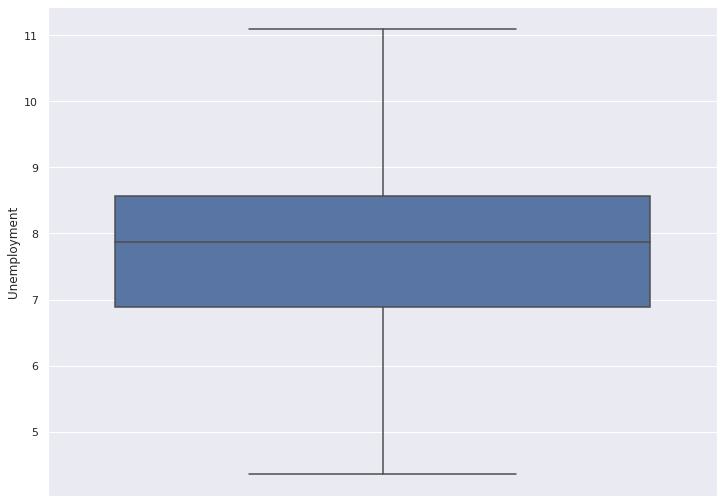

In [61]:
sns.boxplot(y=mldata['Unemployment'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


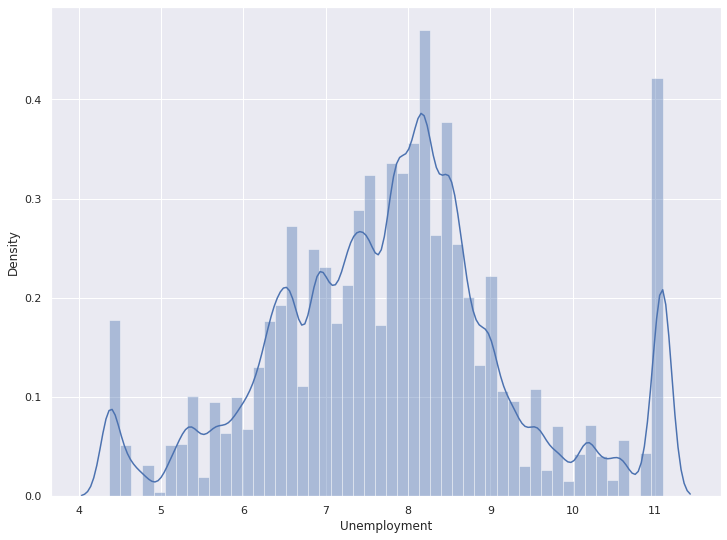

In [62]:
sns.distplot(mldata['Unemployment'])

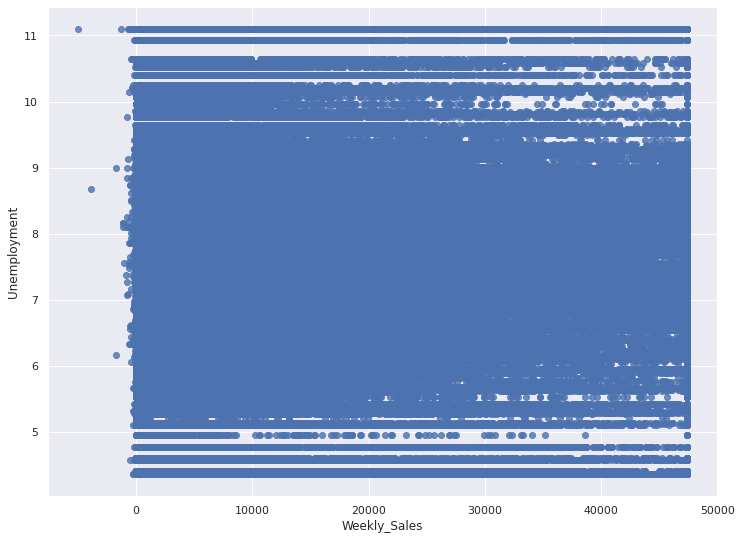

In [63]:
sns.regplot(x='Weekly_Sales',y='Unemployment',scatter=True,fit_reg=False,data=mldata)

 outliers in markdown1

In [64]:
mldata['MarkDown1'].describe()

count    150681.000000
mean       7246.420196
std        8291.221345
min           0.270000
25%        2240.270000
50%        5347.450000
75%        9210.900000
max       88646.760000
Name: MarkDown1, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


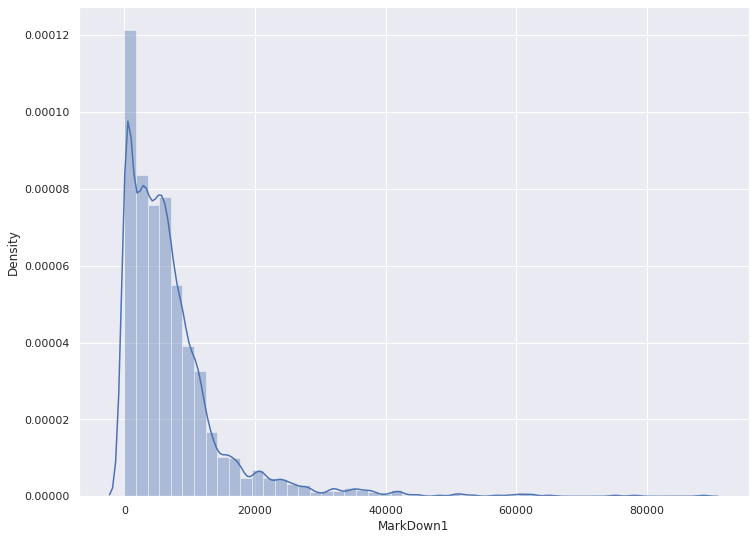

In [65]:
sns.distplot(mldata['MarkDown1'])

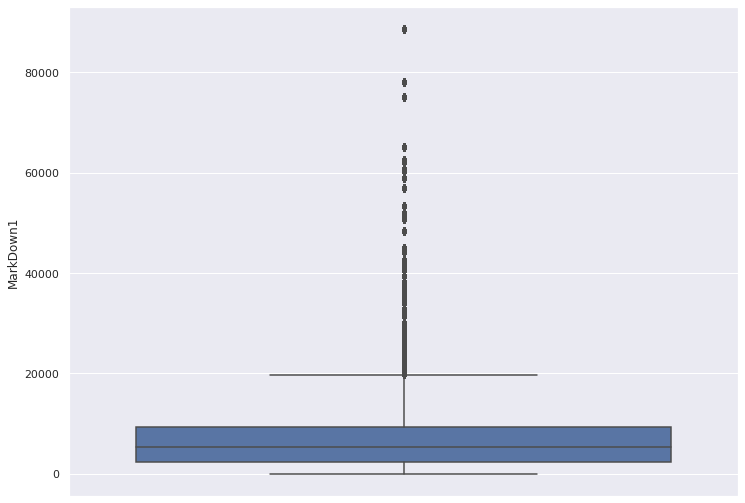

In [66]:
sns.boxplot(y=mldata['MarkDown1'])

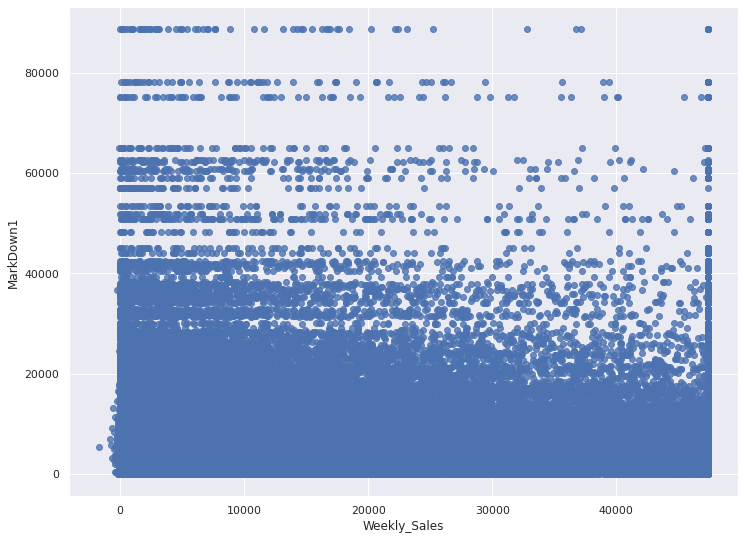

In [67]:
sns.regplot(x='Weekly_Sales',y='MarkDown1',scatter=True,fit_reg=False,data=mldata)

In [68]:
percentile25 = mldata['MarkDown1'].quantile(0.25)
percentile75 = mldata['MarkDown1'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

6970.629999999999

In [69]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 19666.845
Lower limit -8215.675


In [70]:
mldata['MarkDown1'] = np.where(
    mldata['MarkDown1'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown1'] < lower_limit,
        lower_limit,
        mldata['MarkDown1']
    )
)

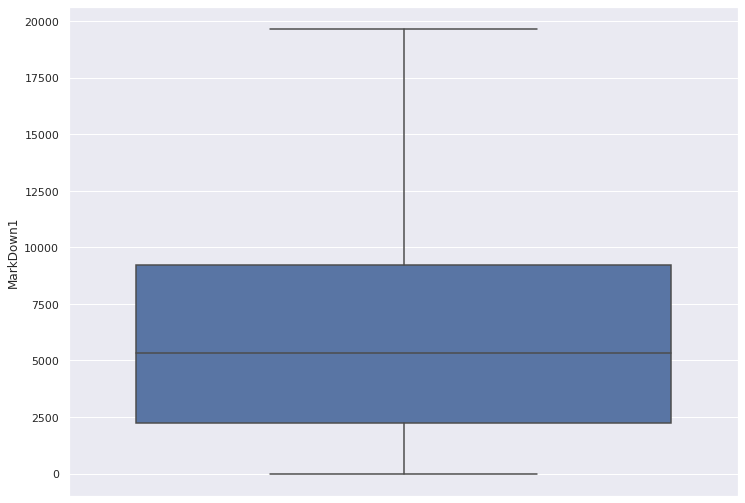

In [71]:
sns.boxplot(y=mldata['MarkDown1'])

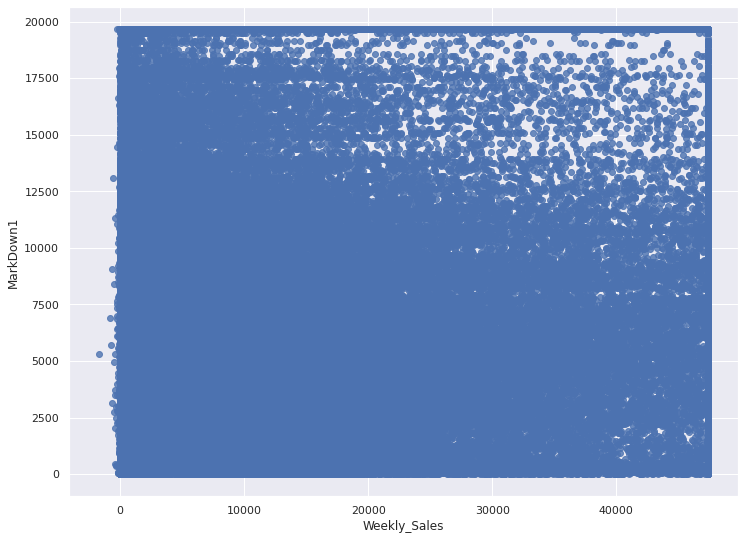

In [72]:
sns.regplot(x='Weekly_Sales',y='MarkDown1',scatter=True,fit_reg=False,data=mldata)

outliers in Markdown2

In [73]:
mldata['MarkDown2'].describe()

count    111248.000000
mean       3334.628621
std        9475.357325
min        -265.760000
25%          41.600000
50%         192.000000
75%        1926.940000
max      104519.540000
Name: MarkDown2, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


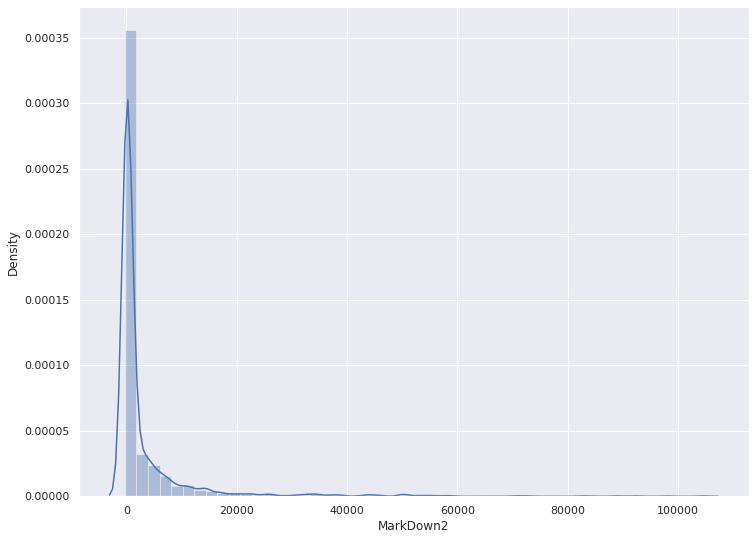

In [74]:
sns.distplot(mldata['MarkDown2'])

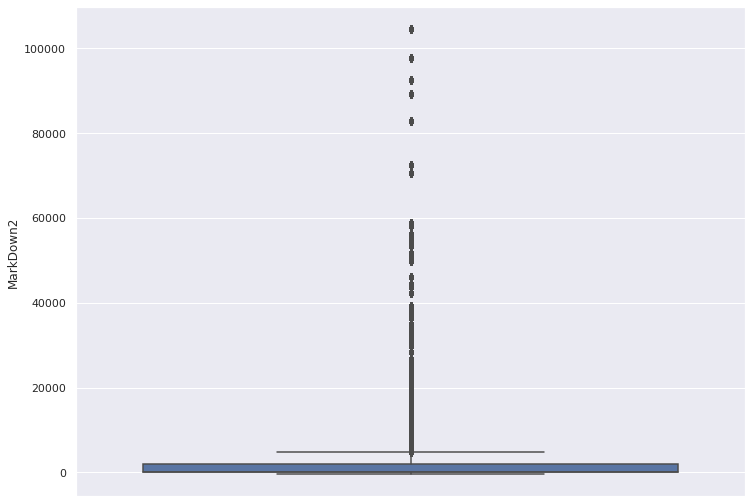

In [75]:
sns.boxplot(y=mldata['MarkDown2'])

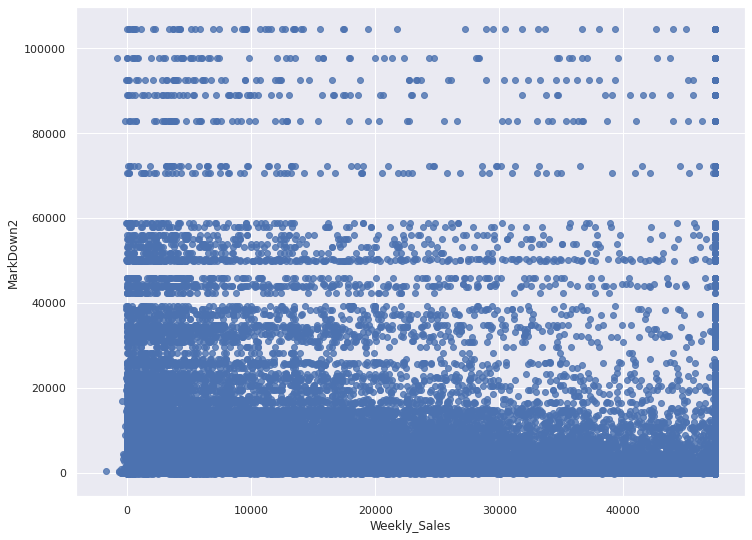

In [76]:
sns.regplot(x='Weekly_Sales',y='MarkDown2',scatter=True,fit_reg=False,data=mldata)

In [77]:
percentile25 = mldata['MarkDown2'].quantile(0.25)
percentile75 = mldata['MarkDown2'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1885.3400000000001

In [78]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 4754.950000000001
Lower limit -2786.4100000000003


In [79]:
mldata['MarkDown2'] = np.where(
    mldata['MarkDown2'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown2'] < lower_limit,
        lower_limit,
        mldata['MarkDown2']
    )
)

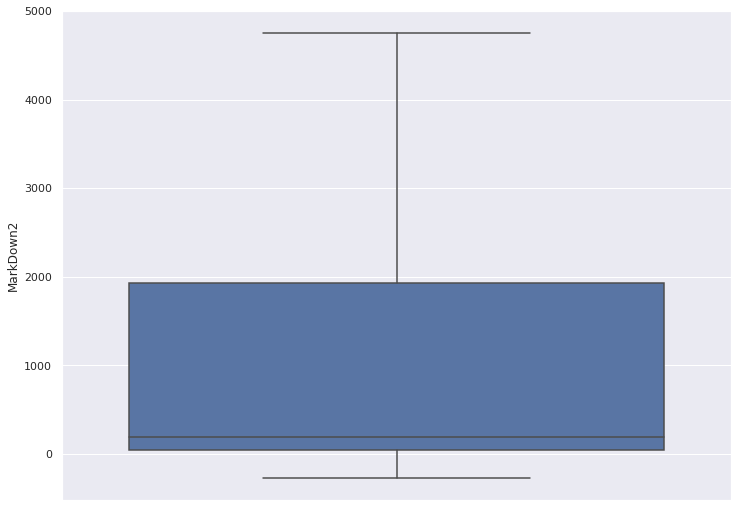

In [80]:
sns.boxplot(y=mldata['MarkDown2'])

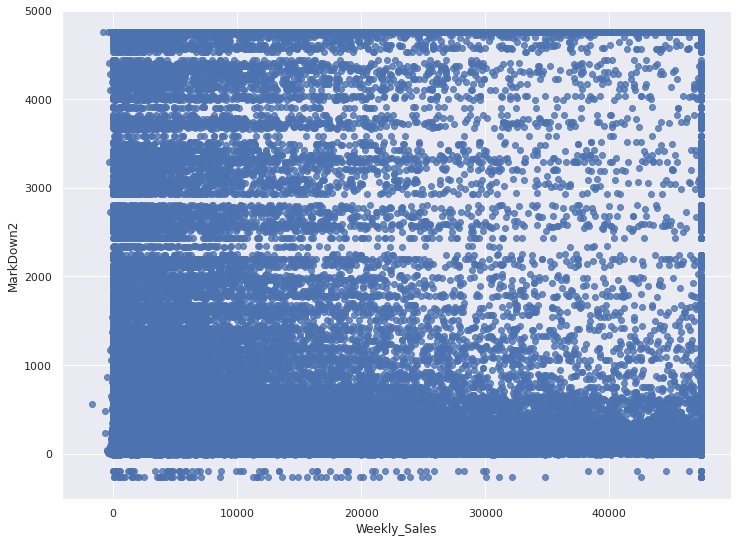

In [81]:
sns.regplot(x='Weekly_Sales',y='MarkDown2',scatter=True,fit_reg=False,data=mldata)

outliers in markdown3

In [82]:
mldata['MarkDown3'].describe()

count    137091.000000
mean       1439.421384
std        9623.078290
min         -29.100000
25%           5.080000
50%          24.600000
75%         103.990000
max      141630.610000
Name: MarkDown3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


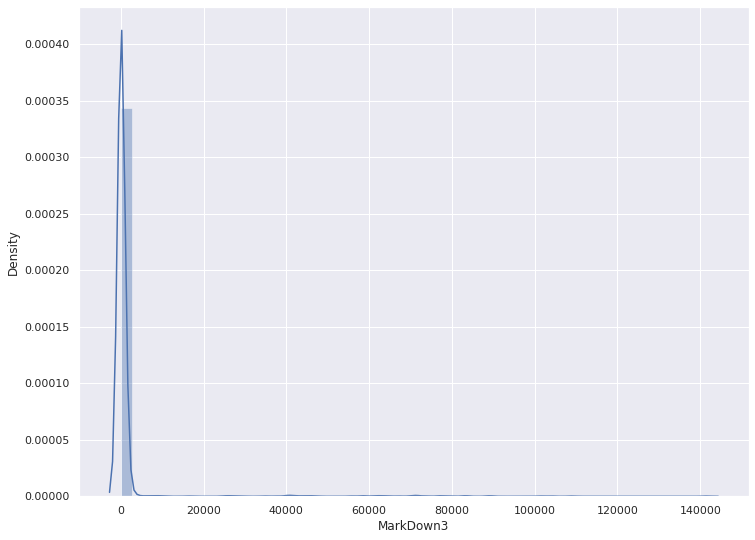

In [83]:
sns.distplot(mldata['MarkDown3'])

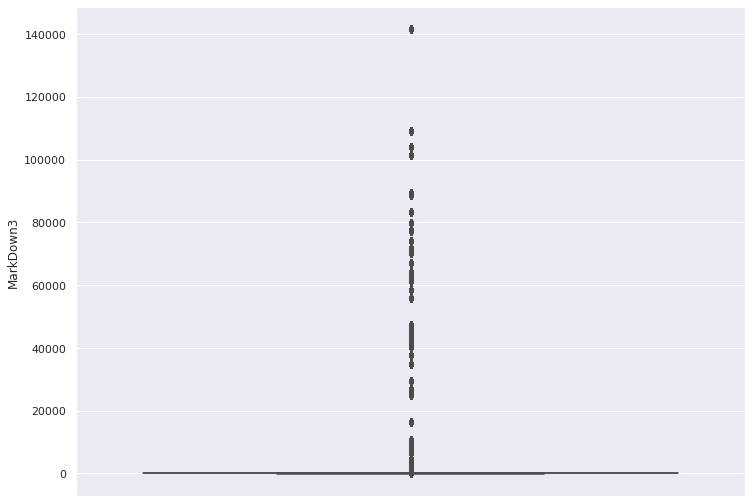

In [84]:
sns.boxplot(y=mldata['MarkDown3'])

In [85]:
percentile25 = mldata['MarkDown3'].quantile(0.25)
percentile75 = mldata['MarkDown3'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

98.91

In [86]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 252.35500000000002
Lower limit -143.285


In [87]:
mldata['MarkDown3'] = np.where(
    mldata['MarkDown3'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown3'] < lower_limit,
        lower_limit,
        mldata['MarkDown3']
    )
)

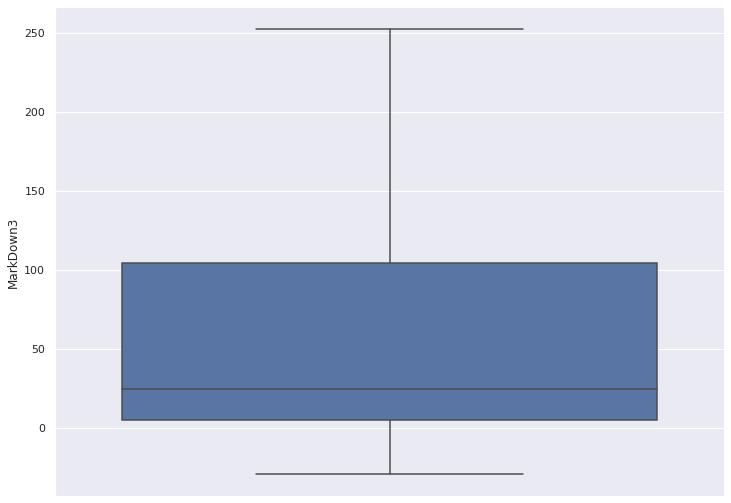

In [88]:
sns.boxplot(y=mldata['MarkDown3'])

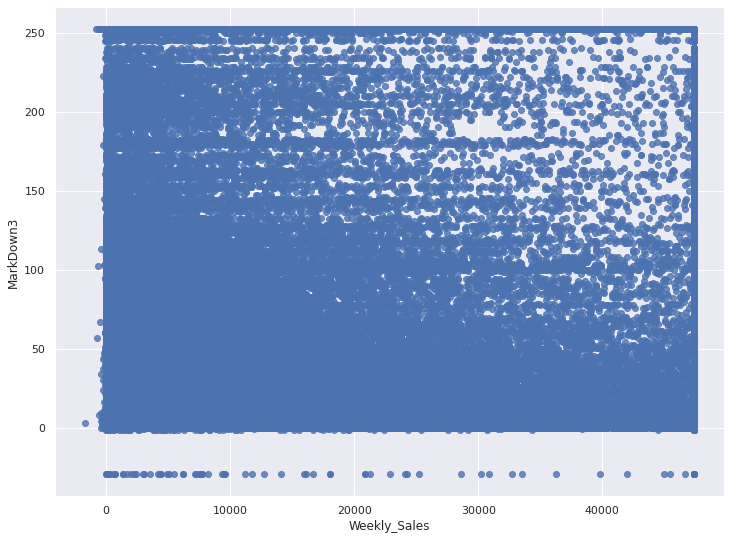

In [89]:
sns.regplot(x='Weekly_Sales',y='MarkDown3',scatter=True,fit_reg=False,data=mldata)

outliers in markdown4

In [90]:
mldata['MarkDown4'].describe()

count    134967.000000
mean       3383.168256
std        6292.384031
min           0.220000
25%         504.220000
50%        1481.310000
75%        3595.040000
max       67474.850000
Name: MarkDown4, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


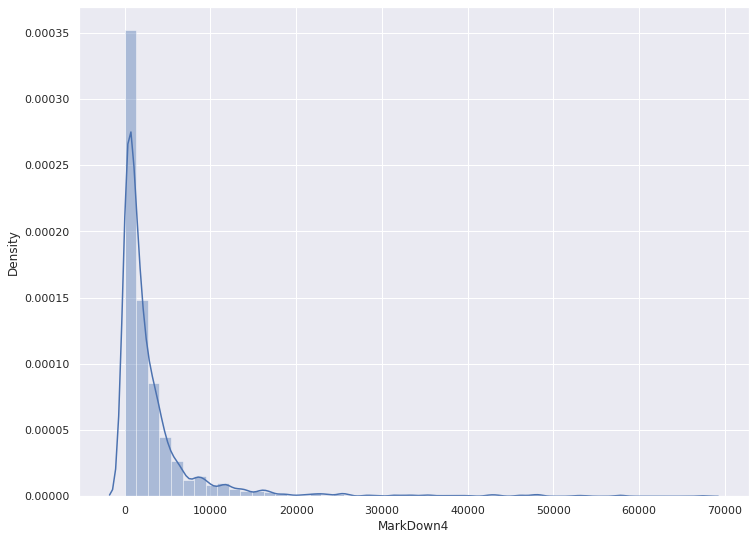

In [91]:
sns.distplot(mldata['MarkDown4'])

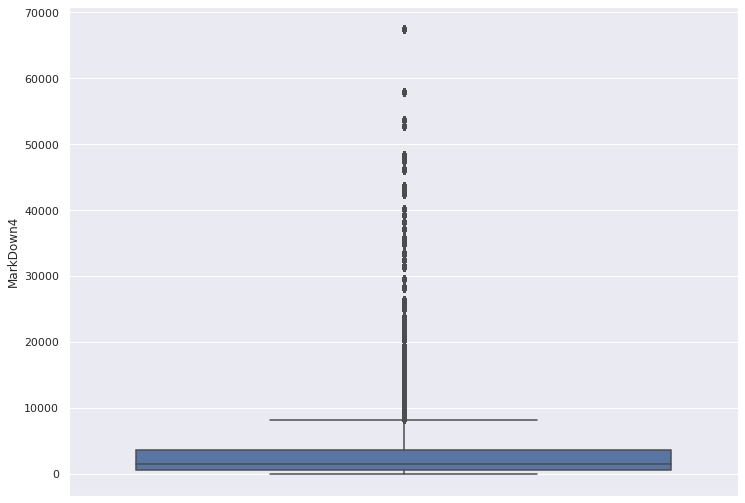

In [92]:
sns.boxplot(y=mldata['MarkDown4'])

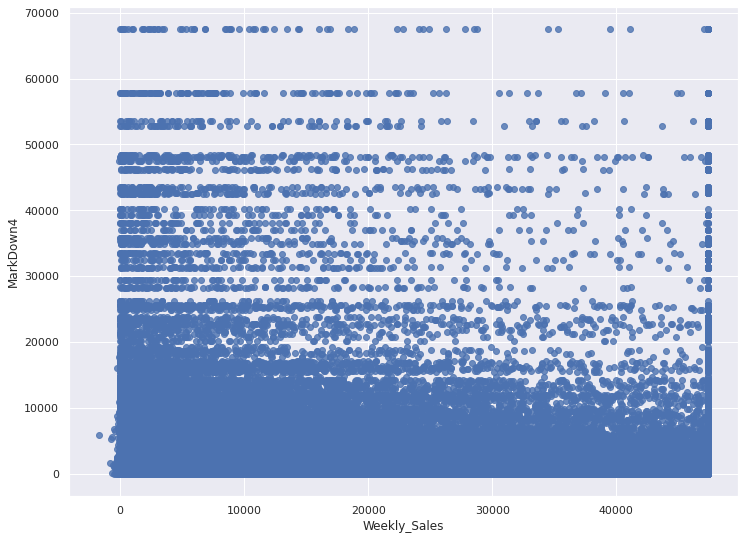

In [93]:
sns.regplot(x='Weekly_Sales',y='MarkDown4',scatter=True,fit_reg=False,data=mldata)

In [94]:
percentile25 = mldata['MarkDown4'].quantile(0.25)
percentile75 = mldata['MarkDown4'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

3090.8199999999997

In [95]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 8231.27
Lower limit -4132.009999999999


In [96]:
mldata['MarkDown4'] = np.where(
    mldata['MarkDown4'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown4'] < lower_limit,
        lower_limit,
        mldata['MarkDown4']
    )
)

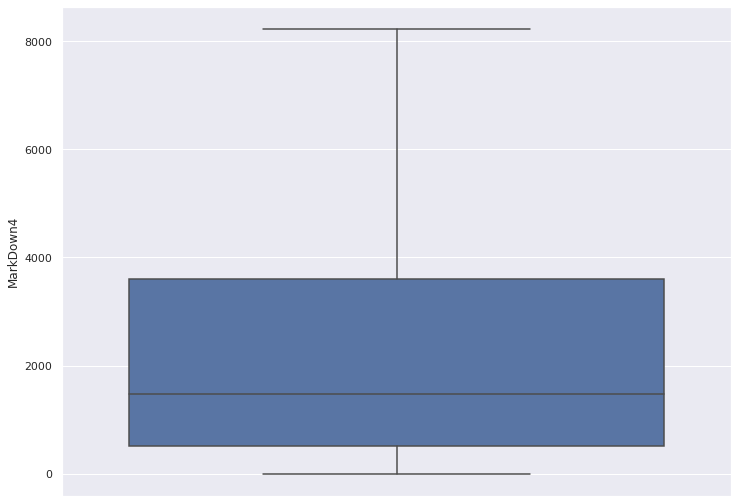

In [97]:
sns.boxplot(y=mldata['MarkDown4'])

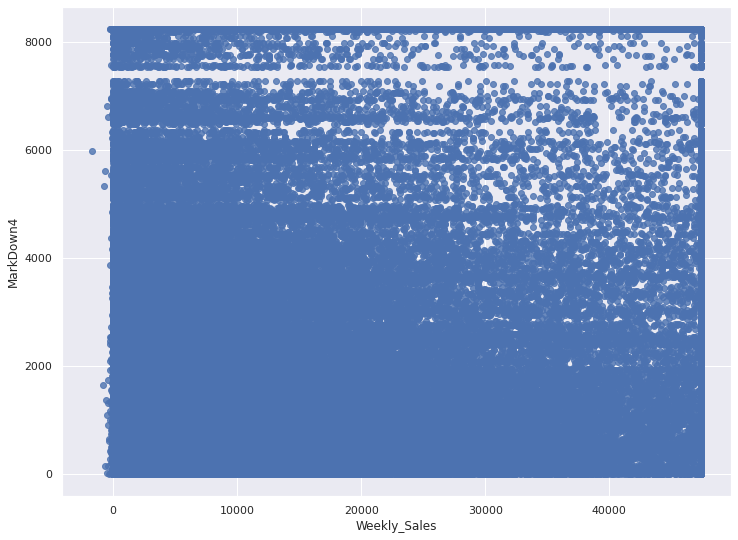

In [98]:
sns.regplot(x='Weekly_Sales',y='MarkDown4',scatter=True,fit_reg=False,data=mldata)

outliers in markdown5

In [99]:
mldata['MarkDown5'].describe()

count    151432.000000
mean       4628.975079
std        5962.887455
min         135.160000
25%        1878.440000
50%        3359.450000
75%        5563.800000
max      108519.280000
Name: MarkDown5, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


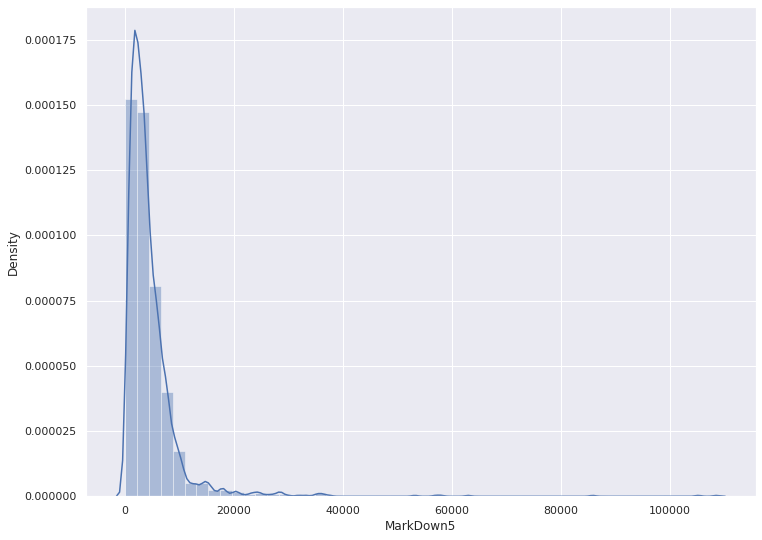

In [100]:
sns.distplot(mldata['MarkDown5'])

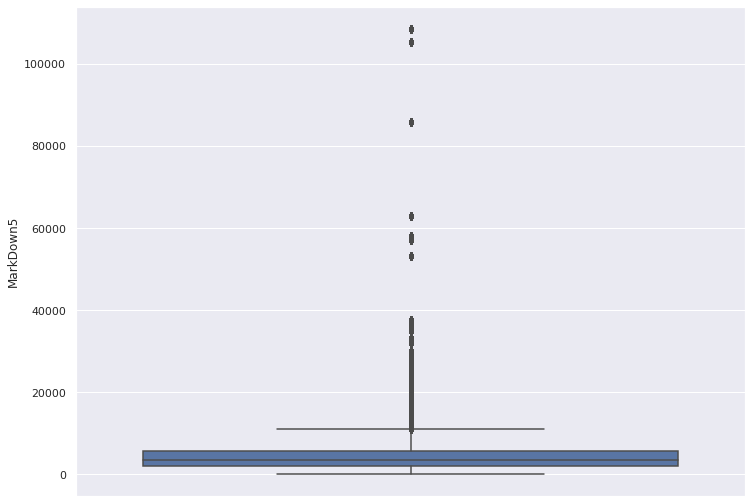

In [101]:
sns.boxplot(y=mldata['MarkDown5'])

In [102]:
percentile25 = mldata['MarkDown5'].quantile(0.25)
percentile75 = mldata['MarkDown5'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

3685.36

In [103]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11091.84
Lower limit -3649.6


In [104]:
mldata['MarkDown5'] = np.where(
    mldata['MarkDown5'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown5'] < lower_limit,
        lower_limit,
        mldata['MarkDown5']
    )
)

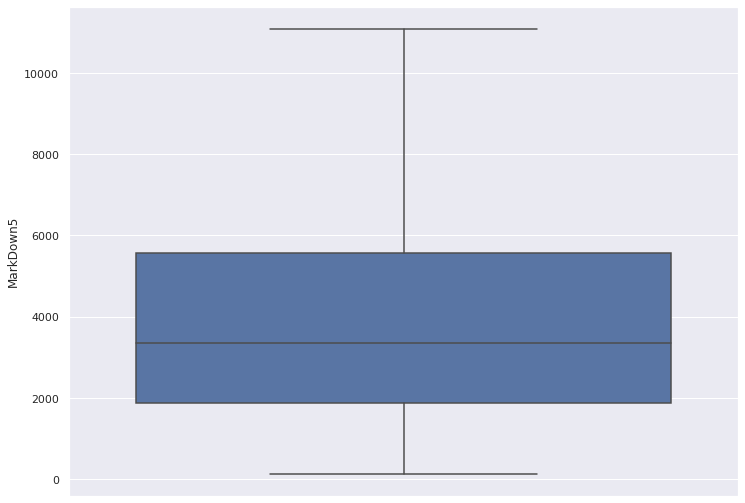

In [105]:
sns.boxplot(y=mldata['MarkDown5'])

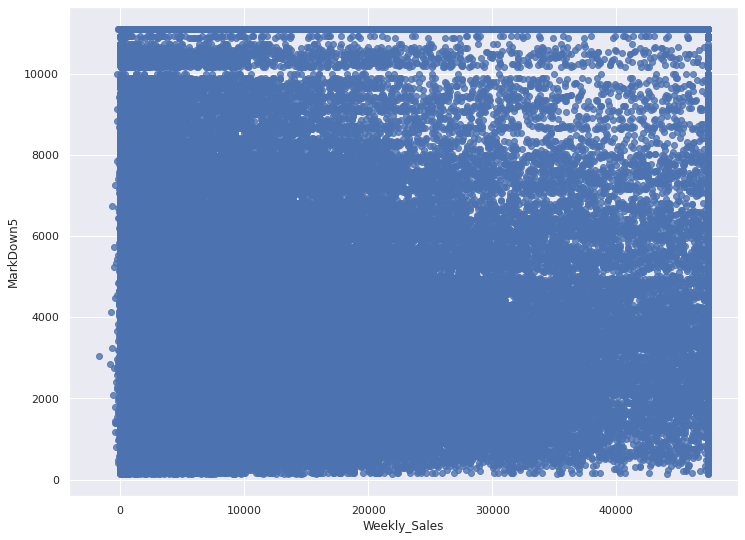

In [106]:
sns.regplot(x='Weekly_Sales',y='MarkDown5',scatter=True,fit_reg=False,data=mldata)

plot between weeklySales and store

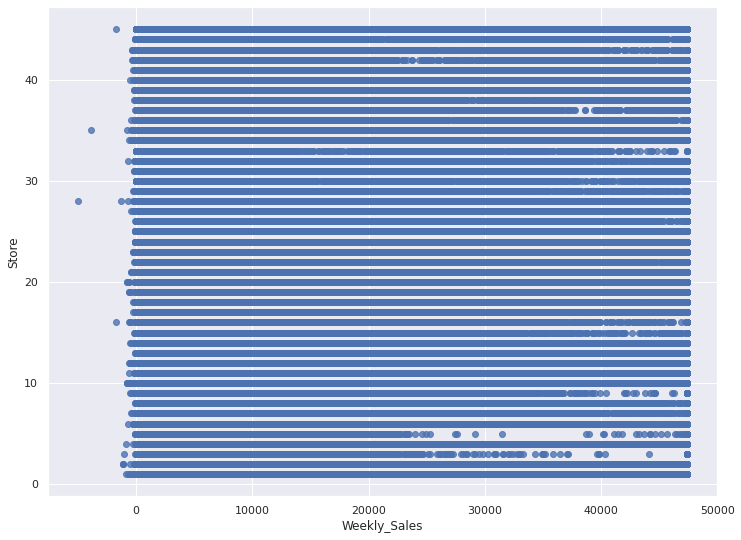

In [107]:
sns.regplot(x='Weekly_Sales',y='Store',scatter=True,fit_reg=False,data=mldata)

plot between weeklySales and Department

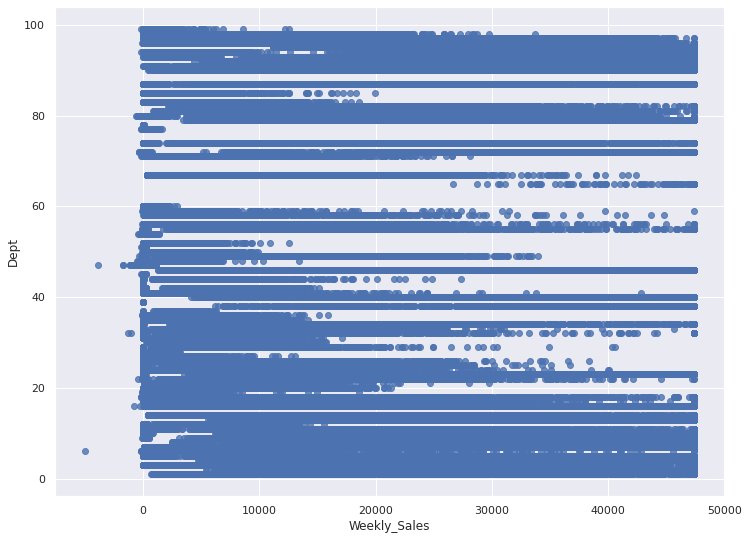

In [108]:
sns.regplot(x='Weekly_Sales',y='Dept',scatter=True,fit_reg=False,data=mldata)

plot between weeklySales and Date

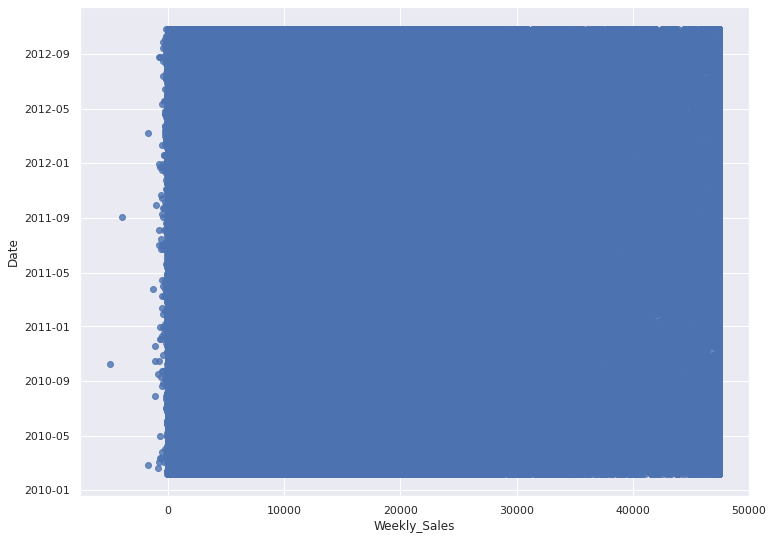

In [109]:
sns.regplot(x=mldata['Weekly_Sales'],y=sales['Date'],scatter=True,fit_reg=False)

# **missing values treatment**

In [110]:
mldata.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
year                 0
month                0
day                  0
dtype: int64

In [111]:
mldata['MarkDown1']=mldata['MarkDown1'].fillna(0)
mldata['MarkDown2']=mldata['MarkDown2'].fillna(0)
mldata['MarkDown3']=mldata['MarkDown3'].fillna(0)
mldata['MarkDown4']=mldata['MarkDown4'].fillna(0)
mldata['MarkDown5']=mldata['MarkDown5'].fillna(0)
mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2010,2,5
1,1,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,2010,2,12
2,1,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2010,2,19
3,1,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2010,2,26
4,1,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421566,45,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421567,45,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421568,45,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


In [112]:
mldata.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [113]:
mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2010,2,5
1,1,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,2010,2,12
2,1,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2010,2,19
3,1,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2010,2,26
4,1,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421566,45,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421567,45,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421568,45,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


In [114]:
mldata1=mldata.copy(deep=True)
mldata1

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2010,2,5
1,1,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,2010,2,12
2,1,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2010,2,19
3,1,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2010,2,26
4,1,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28
421566,45,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5
421567,45,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2012,10,12
421568,45,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2012,10,19


In [115]:
corelation=mldata.corr()
round(corelation,3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
Store,1.000,0.024,-0.077,-0.001,-0.050,0.065,-0.071,-0.030,-0.041,-0.071,-0.042,-0.211,0.241,0.003,0.001,-0.000
Dept,0.024,1.000,0.103,0.001,0.004,0.004,0.001,0.000,0.002,0.002,0.003,-0.007,0.009,0.004,0.001,-0.001
Weekly_Sales,-0.077,0.103,1.000,0.007,0.002,0.003,0.059,0.017,0.066,0.058,0.066,-0.031,-0.021,-0.011,0.027,-0.006
IsHoliday,-0.001,0.001,0.007,1.000,-0.156,-0.078,0.008,0.119,0.132,0.021,-0.003,-0.002,0.011,-0.057,0.123,0.045
Temperature,-0.050,0.004,0.002,-0.156,1.000,0.144,-0.011,-0.272,-0.155,-0.002,-0.035,0.182,0.080,0.066,0.236,0.027
Fuel_Price,0.065,0.004,0.003,-0.078,0.144,1.000,0.369,0.123,0.158,0.281,0.340,-0.164,-0.054,0.780,-0.041,0.028
MarkDown1,-0.071,0.001,0.059,0.008,-0.011,0.369,1.000,0.425,0.413,0.854,0.695,0.018,-0.132,0.597,-0.077,-0.102
MarkDown2,-0.030,0.000,0.017,0.119,-0.272,0.123,0.425,1.000,0.303,0.388,0.391,-0.003,-0.080,0.319,-0.219,-0.006
MarkDown3,-0.041,0.002,0.066,0.132,-0.155,0.158,0.413,0.303,1.000,0.334,0.521,0.008,-0.096,0.274,0.190,-0.031
MarkDown4,-0.071,0.002,0.058,0.021,-0.002,0.281,0.854,0.388,0.334,1.000,0.616,0.009,-0.129,0.502,-0.067,-0.132


In [116]:
mldata.corr().loc[:,'Weekly_Sales'].abs().sort_values(ascending=False)[1:]

Dept            0.102538
Store           0.076752
MarkDown3       0.066100
MarkDown5       0.065511
MarkDown1       0.059009
MarkDown4       0.058363
CPI             0.031199
month           0.026760
Unemployment    0.021035
MarkDown2       0.016569
year            0.011484
IsHoliday       0.006511
day             0.005984
Fuel_Price      0.003405
Temperature     0.002263
Name: Weekly_Sales, dtype: float64

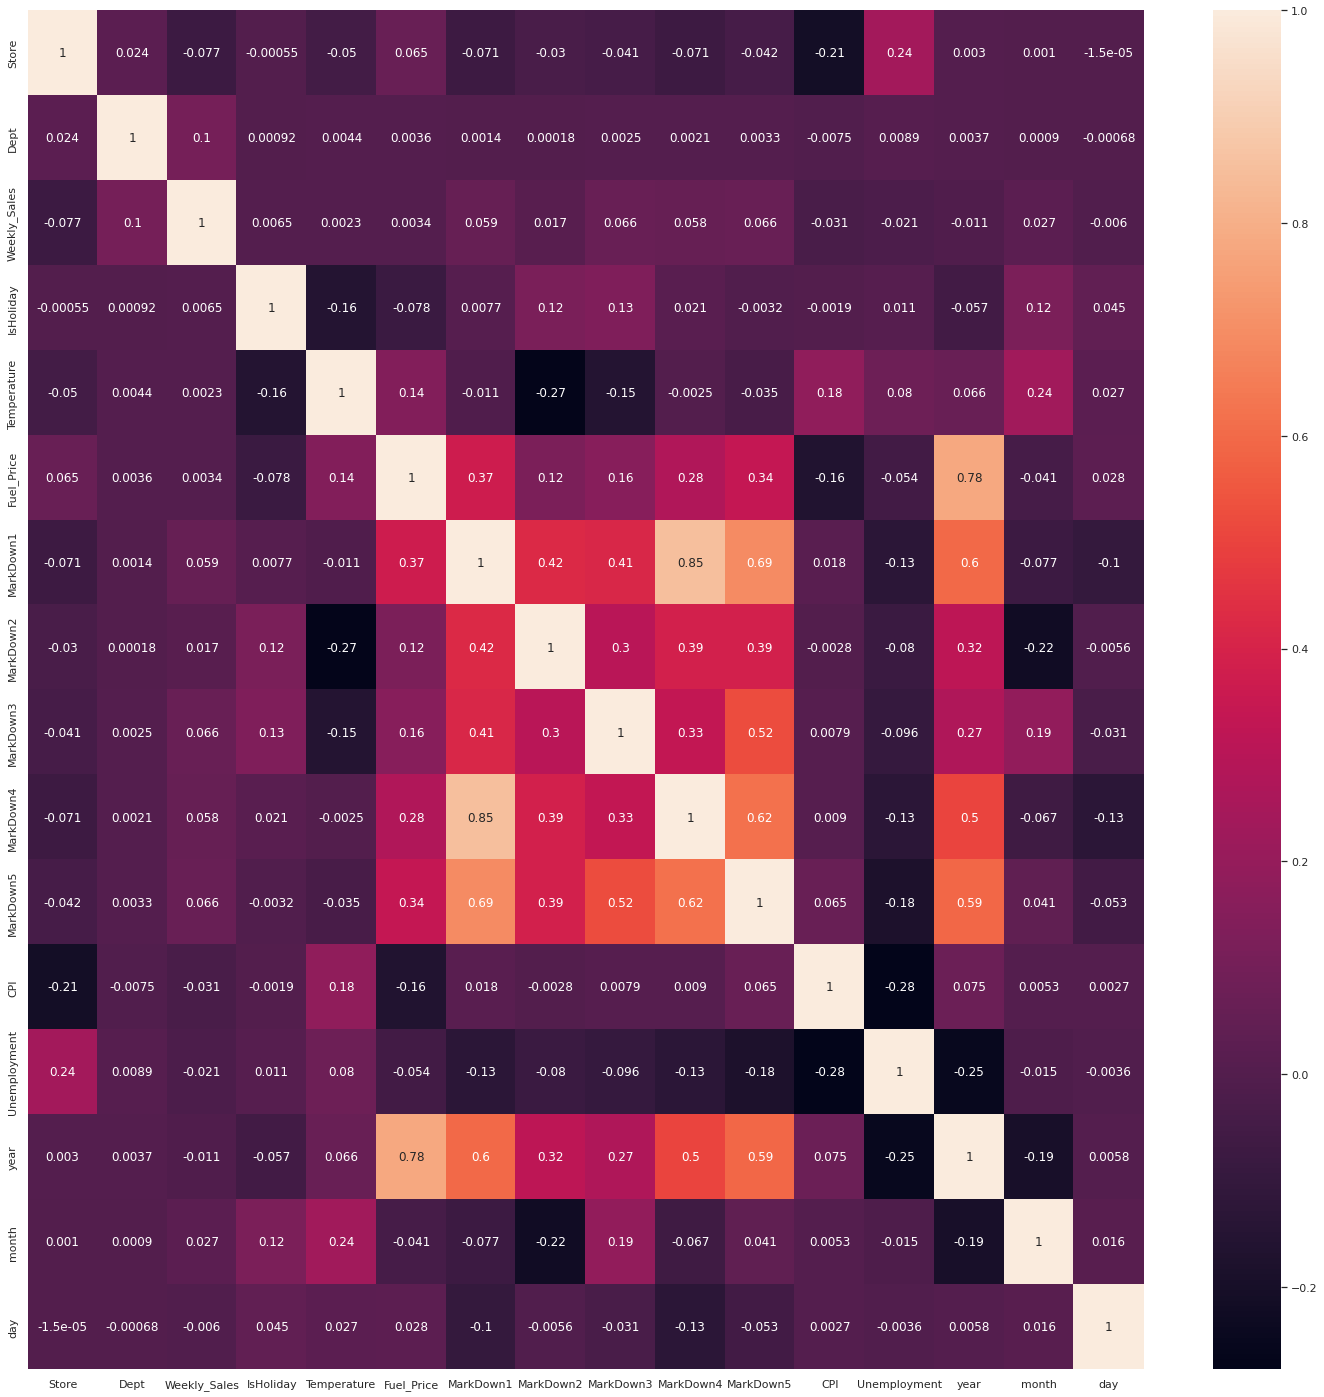

In [117]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(mldata.corr(), annot=True)

In [118]:
sns.set(rc={'figure.figsize':(12,9)})

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_vars = ['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','CPI','Unemployment', 'year', 'month','day']
mldata[num_vars] = scaler.fit_transform(mldata[num_vars])

mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,0.0,0.000000,0.571040,0,0.393776,0.050100,0.000000,0.052933,0.103391,0.000000,0.000000,0.840500,0.555696,0.0,0.090909,0.133333
1,0.0,0.000000,0.974121,1,0.353941,0.038076,0.000000,0.052933,0.103391,0.000000,0.000000,0.841941,0.555696,0.0,0.090909,0.366667
2,0.0,0.000000,0.889287,0,0.368826,0.021042,0.000000,0.052933,0.103391,0.000000,0.000000,0.842405,0.555696,0.0,0.090909,0.600000
3,0.0,0.000000,0.465647,0,0.439062,0.044589,0.000000,0.052933,0.103391,0.000000,0.000000,0.842707,0.555696,0.0,0.090909,0.833333
4,0.0,0.000000,0.511927,0,0.437699,0.076653,0.000000,0.052933,0.103391,0.000000,0.000000,0.843008,0.555696,0.0,0.181818,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.989796,0.104942,0,0.630374,0.764028,0.231690,0.057044,0.108721,0.194503,0.296457,0.651876,0.641657,1.0,0.727273,0.900000
421566,1.0,0.989796,0.107228,0,0.630479,0.758016,0.256612,0.052933,0.170258,0.273765,0.210967,0.653427,0.639128,1.0,0.818182,0.133333
421567,1.0,0.989796,0.115492,0,0.521247,0.765531,0.099471,0.052933,0.131424,0.072810,0.359773,0.654977,0.639128,1.0,0.818182,0.366667
421568,1.0,0.989796,0.109746,0,0.542213,0.750000,0.101898,0.052933,0.114690,0.053179,0.138615,0.655013,0.639128,1.0,0.818182,0.600000


# Multiple Regression

In [120]:
from sklearn.model_selection import train_test_split
mdf_train, mdf_test = train_test_split(mldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [121]:
# Dividing the training data set into X and Y
my_train = mdf_train.pop('Weekly_Sales')
mX_train = mdf_train
my_test = mdf_test.pop('Weekly_Sales')
mX_test = mdf_test

In [122]:
from sklearn.linear_model import LinearRegression
mregressor = LinearRegression()
mregressor.fit(mX_train, my_train)

LinearRegression()

In [123]:
m = mregressor.coef_
c = mregressor.intercept_,
print("Estimated model weights, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model weights, m: [-0.07384478  0.0960207   0.00303814  0.02609895  0.093211    0.03716481
 -0.01155532  0.0521684   0.03378038  0.09509303 -0.02796015 -0.03495995
 -0.11748337 -0.01444226  0.00544768]
Estimated model intercept, c: (0.35577341045905986,)


In [124]:
my_pred_test =  mregressor.predict(mX_test)
my_pred_train =  mregressor.predict(mX_train)

In [125]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [126]:
#Training Accuracies
mrmse = math.sqrt(mean_squared_error(my_train, my_pred_train)) 
print('Root mean square error', mrmse) 
mmse = (mean_squared_error(my_train, my_pred_train)) 
print('Mean square error', mmse) 
mmae=mean_absolute_error(my_train, my_pred_train)
print('Mean absolute error', mmae)

Root mean square error 0.2803241495460516
Mean square error 0.0785816288187171
Mean absolute error 0.22666156910118077


In [127]:
#Training Accuracies
mrmse = math.sqrt(mean_squared_error(my_test, my_pred_test)) 
print('Root mean square error', mrmse) 
mmse = (mean_squared_error(my_test, my_pred_test)) 
print('Mean square error', mmse) 
mmae=mean_absolute_error(my_test, my_pred_test)
print('Mean absolute error', mmae)

Root mean square error 0.279501178602599
Mean square error 0.07812090884024193
Mean absolute error 0.2260168673696416


Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

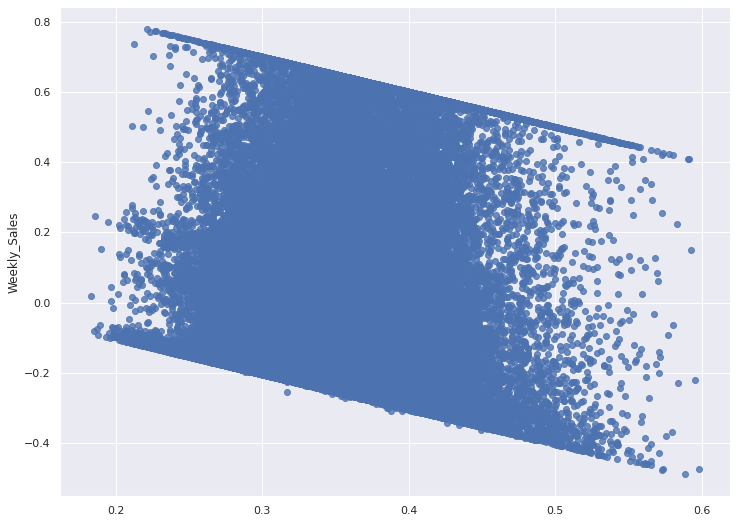

In [128]:
multipletest_residuals=my_test-my_pred_test
sns.regplot(x=my_pred_test,y=multipletest_residuals,scatter=True,fit_reg=False)

In [129]:
multipletest_residuals.describe().round(3)

count    84314.000
mean        -0.001
std          0.280
min         -0.489
25%         -0.207
50%         -0.110
75%          0.130
max          0.778
Name: Weekly_Sales, dtype: float64

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

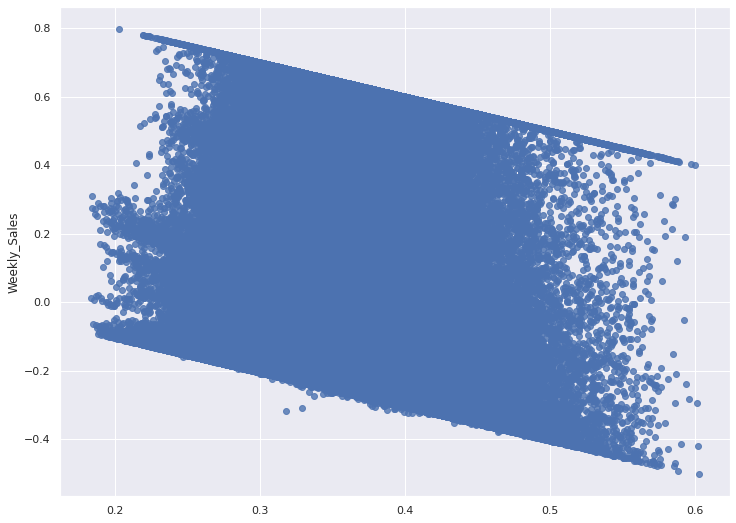

In [130]:
multipletrain_residuals=my_train-my_pred_train
sns.regplot(x=my_pred_train,y=multipletrain_residuals,scatter=True,fit_reg=False)

In [131]:
multipletrain_residuals.describe().round(3)

count    337256.000
mean         -0.000
std           0.280
min          -0.502
25%          -0.206
50%          -0.110
75%           0.131
max           0.797
Name: Weekly_Sales, dtype: float64

In [132]:
import pickle
# Save the model
filename = 'modelmultipleRegressionf.pkl'
pickle.dump(mregressor, open(filename, 'wb'))

# Decision Tree

In [133]:
from sklearn.model_selection import train_test_split
ddf_train, ddf_test = train_test_split(mldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [134]:
# Dividing the training data set into X and Y
dy_train = ddf_train.pop('Weekly_Sales')
dX_train = ddf_train
dy_test = ddf_test.pop('Weekly_Sales')
dX_test = ddf_test

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree # tree diagram
decisionregressor = DecisionTreeRegressor()
decisionregressor.fit(dX_train, dy_train)

DecisionTreeRegressor()

In [136]:
dy_pred_test = decisionregressor.predict(dX_test)
ddf = pd.DataFrame({'Real Values':dy_test, 'Predicted Values':dy_pred_test})
ddf

,Real Values,Predicted Values
124242,0.176017,0.168144
6119,0.110128,0.101614
420889,0.169152,0.137010
359495,0.143369,0.140576
337459,0.097349,0.096027
...,...,...
131802,0.106697,0.105628
25152,0.207877,0.199360
203612,0.130641,0.129237
215695,0.513863,0.507780


In [137]:
dy_pred_train = decisionregressor.predict(dX_train)
ddf = pd.DataFrame({'Real Values':dy_train, 'Predicted Values':dy_pred_train})
ddf

,Real Values,Predicted Values
115270,1.000000,1.000000
298111,0.188055,0.188055
263879,0.100559,0.100559
104742,0.158043,0.158043
365754,0.134468,0.134468
...,...,...
339799,0.095543,0.095543
253799,0.096750,0.096750
210755,0.122775,0.122775
56088,0.101423,0.101423


In [138]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [139]:
#Training Accuracies
drmse = math.sqrt(mean_squared_error(dy_train, dy_pred_train)) 
print('Root mean square error', drmse) 
dmse = (mean_squared_error(dy_train, dy_pred_train)) 
print('Mean square error', dmse) 
dmae=mean_absolute_error(dy_train, dy_pred_train)
print('Mean absolute error', dmae)

Root mean square error 2.029723581769536e-17
Mean square error 4.119777818391355e-34
Mean absolute error 3.718399131417515e-18


In [140]:
#Training Accuracies
drmse = math.sqrt(mean_squared_error(dy_test, dy_pred_test)) 
print('Root mean square error', drmse) 
dmse = (mean_squared_error(dy_test, dy_pred_test)) 
print('Mean square error', dmse) 
dmae=mean_absolute_error(dy_test, dy_pred_test)
print('Mean absolute error', dmae)

Root mean square error 0.0543814182696912
Mean square error 0.0029573386530231042
Mean absolute error 0.025433009550460062


Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

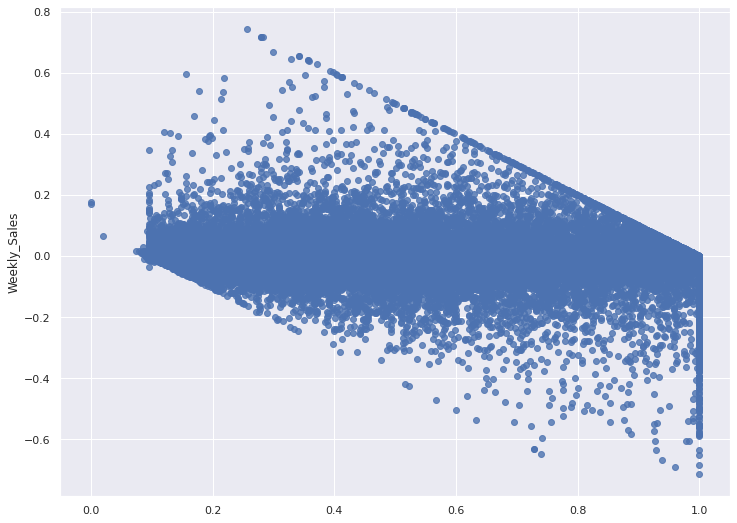

In [141]:
decisiontest_residuals=dy_test-dy_pred_test
sns.regplot(x=dy_pred_test,y=decisiontest_residuals,scatter=True,fit_reg=False)

In [142]:
decisiontest_residuals.describe()

count    84314.000000
mean        -0.000394
std          0.054380
min         -0.713299
25%         -0.009691
50%          0.000000
75%          0.009556
max          0.743943
Name: Weekly_Sales, dtype: float64

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

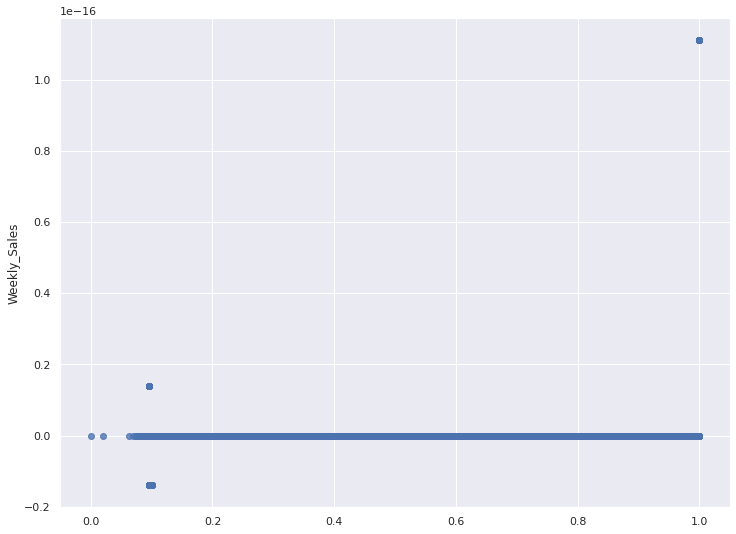

In [143]:
decisiontrain_residuals=dy_train-dy_pred_train
sns.regplot(x=dy_pred_train,y=decisiontrain_residuals,scatter=True,fit_reg=False)

In [144]:
decisiontrain_residuals.describe().round(3)

count    337256.0
mean          0.0
std           0.0
min          -0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Weekly_Sales, dtype: float64

In [145]:
import pickle
# Save the model
filename = 'modeldecisiontreesf.pkl'
pickle.dump(decisionregressor, open(filename, 'wb'))

# Random Forest Model

In [146]:
from sklearn.model_selection import train_test_split
r_train, r_test = train_test_split(mldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [147]:
# Dividing the training data set into X and Y
ry_train = r_train.pop('Weekly_Sales')
rX_train = r_train
ry_test = r_test.pop('Weekly_Sales')
rX_test = r_test

In [148]:

from sklearn.ensemble import RandomForestRegressor
randomregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)  
randomregressor.fit(rX_train, ry_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [149]:
ry_pred_test = randomregressor.predict(rX_test)
rdf = pd.DataFrame({'Real Values':ry_test, 'Predicted Values':ry_pred_test})
rdf

,Real Values,Predicted Values
124242,0.176017,0.178495
6119,0.110128,0.113722
420889,0.169152,0.151275
359495,0.143369,0.143036
337459,0.097349,0.096643
...,...,...
131802,0.106697,0.108020
25152,0.207877,0.197077
203612,0.130641,0.126963
215695,0.513863,0.494319


In [150]:
ry_pred_train = randomregressor.predict(rX_train)
rdf = pd.DataFrame({'Real Values':ry_train, 'Predicted Values':ry_pred_train})
rdf

,Real Values,Predicted Values
115270,1.000000,0.994911
298111,0.188055,0.195121
263879,0.100559,0.100757
104742,0.158043,0.150356
365754,0.134468,0.134884
...,...,...
339799,0.095543,0.095741
253799,0.096750,0.097009
210755,0.122775,0.122696
56088,0.101423,0.101441


error metrics

In [151]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [152]:
#Training Accuracies
rrmse = math.sqrt(mean_squared_error(ry_train, ry_pred_train)) 
print('Root mean square error', rrmse) 
rmse = (mean_squared_error(ry_train, ry_pred_train)) 
print('Mean square error', rmse) 
rmae=mean_absolute_error(ry_train, ry_pred_train)
print('Mean absolute error', rmae)

Root mean square error 0.018278706717022055
Mean square error 0.0003341111192469072
Mean absolute error 0.008357538524561678


In [153]:
#Training Accuracies
rrmse = math.sqrt(mean_squared_error(ry_test, ry_pred_test)) 
print('Root mean square error', rmse) 
rmse = (mean_squared_error(ry_test, ry_pred_test)) 
print('Mean square error', rmse) 
rmae=mean_absolute_error(ry_test, ry_pred_test)
print('Mean absolute error', rmae)

Root mean square error 0.0003341111192469072
Mean square error 0.0018666169502113902
Mean absolute error 0.021211737553517133


Residual plot
(plot between  predected values and difference between actualvalues and predicted values) for test data

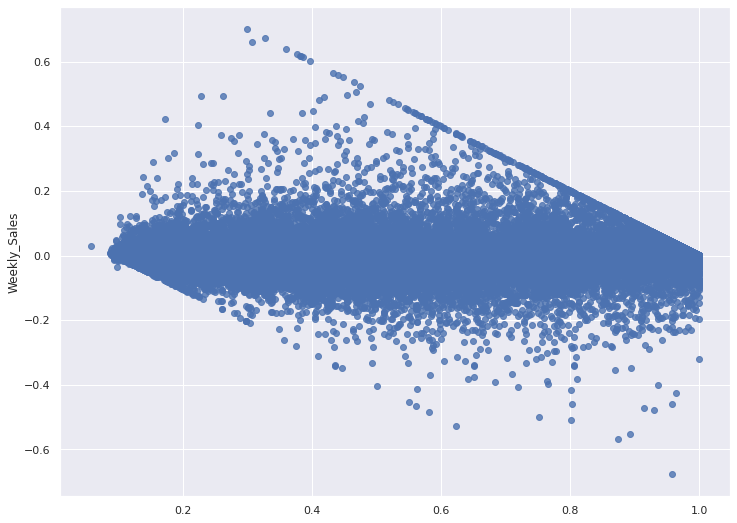

In [154]:

radomtest_residuals=ry_test-ry_pred_test
sns.regplot(x=ry_pred_test,y=radomtest_residuals,scatter=True,fit_reg=False)

In [155]:
radomtest_residuals.describe()


count    84314.000000
mean        -0.000680
std          0.043199
min         -0.676318
25%         -0.010236
50%         -0.000118
75%          0.006662
max          0.700137
Name: Weekly_Sales, dtype: float64

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

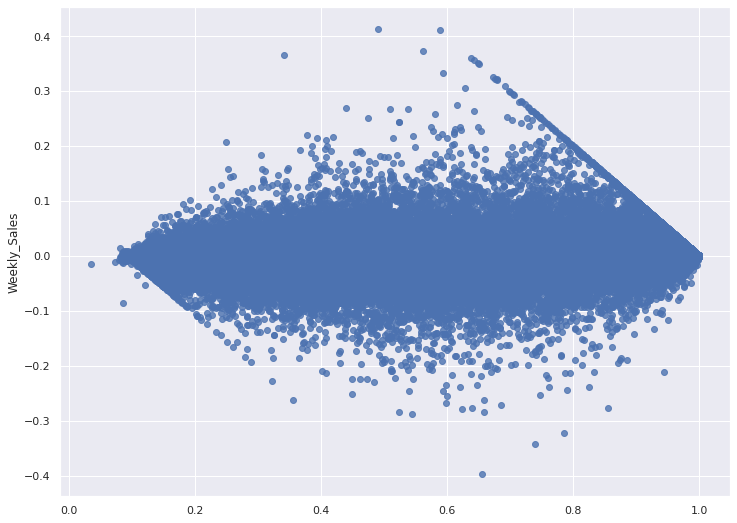

In [156]:
radomtrain_residuals=ry_train-ry_pred_train
sns.regplot(x=ry_pred_train,y=radomtrain_residuals,scatter=True,fit_reg=False)

In [157]:
radomtrain_residuals.describe()

count    3.372560e+05
mean    -2.299979e-04
std      1.827729e-02
min     -3.963301e-01
25%     -3.361769e-03
50%      1.110223e-16
75%      2.477913e-03
max      4.129013e-01
Name: Weekly_Sales, dtype: float64

In [158]:
import pickle
# Save the model
filename = 'modelradomforest10.pkl'
pickle.dump(randomregressor, open(filename, 'wb'))